<a href="https://colab.research.google.com/github/oesihyeon/Vote_App_DA/blob/main/final_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro, levene, ttest_ind

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')
import sys
sys.stderr = open(os.devnull, "w")  # silence stderr
sys.stderr = sys.__stderr__  # unsilence stderr

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### 개발환경 세팅하기

# ▶ 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!ls /content/drive/MyDrive/'Colab Notebooks'/final_project

accounts_attendance.csv		 accounts_school.csv		  hackle_events.csv
accounts_blockrecord.csv	 accounts_timelinereport.csv	  hackle_properties.csv
accounts_failpaymenthistory.csv  accounts_user_contacts.csv	  polls_question.csv
accounts_friendrequest.csv	 accounts_user.csv		  polls_questionpiece.csv
accounts_group.csv		 accounts_userquestionrecord.csv  polls_questionreport.csv
accounts_nearbyschool.csv	 accounts_userwithdraw.csv	  polls_questionset.csv
accounts_paymenthistory.csv	 device_properties.csv		  polls_usercandidate.csv
accounts_pointhistory.csv	 event_receipts.csv		  user_properties.csv


In [ ]:
import pandas as pd

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# 기본 경로 설정
base_path = '/content/drive/MyDrive/Colab Notebooks/final_project/'

# 각 CSV 파일을 읽어와 데이터프레임으로 저장
accounts_attendance = pd.read_csv(base_path + 'accounts_attendance.csv')
accounts_blockrecord = pd.read_csv(base_path + 'accounts_blockrecord.csv')
accounts_failpaymenthistory = pd.read_csv(base_path + 'accounts_failpaymenthistory.csv')
accounts_friendrequest = pd.read_csv(base_path + 'accounts_friendrequest.csv')
accounts_group = pd.read_csv(base_path + 'accounts_group.csv')
accounts_nearbyschool = pd.read_csv(base_path + 'accounts_nearbyschool.csv')
accounts_paymenthistory = pd.read_csv(base_path + 'accounts_paymenthistory.csv')
accounts_pointhistory = pd.read_csv(base_path + 'accounts_pointhistory.csv')
accounts_school = pd.read_csv(base_path + 'accounts_school.csv')
accounts_timelinereport = pd.read_csv(base_path + 'accounts_timelinereport.csv')
accounts_user_contacts = pd.read_csv(base_path + 'accounts_user_contacts.csv')
accounts_user = pd.read_csv(base_path + 'accounts_user.csv')
accounts_userquestionrecord = pd.read_csv(base_path + 'accounts_userquestionrecord.csv')
accounts_userwithdraw = pd.read_csv(base_path + 'accounts_userwithdraw.csv')
device_properties = pd.read_csv(base_path + 'device_properties.csv')
event_receipts = pd.read_csv(base_path + 'event_receipts.csv')
hackle_events = pd.read_csv(base_path + 'hackle_events.csv')
hackle_properties = pd.read_csv(base_path + 'hackle_properties.csv')
polls_question = pd.read_csv(base_path + 'polls_question.csv')
polls_questionpiece = pd.read_csv(base_path + 'polls_questionpiece.csv')
polls_questionreport = pd.read_csv(base_path + 'polls_questionreport.csv')
polls_questionset = pd.read_csv(base_path + 'polls_questionset.csv')
polls_usercandidate = pd.read_csv(base_path + 'polls_usercandidate.csv')
user_properties = pd.read_csv(base_path + 'user_properties.csv')

# 데이터 확인 (예: 첫 번째 5개 행 출력)
print(accounts_attendance.head())
print(accounts_blockrecord.head())
print(polls_question.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   id                               attendance_date_list  user_id
0   1  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1446852
1   2  ['2023-05-27', '2023-05-29', '2023-05-30', '20...  1359398
2   3  ['2023-05-27', '2023-05-29', '2023-05-30', '20...  1501542
3   4  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1507767
4   5  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1287453
   id              reason           created_at  block_user_id  user_id
0   1               그냥...  2023-05-04 23:01:53         867483   878476
1   2         친구 사이가 어색해짐  2023-05-05 01:17:08         867190   867564
2   3  나랑 관련 없는 질문을 자꾸 보냄  2023-05-05 01:50:55         875110   875261
3   6               그냥...  2023-05-05 05:21:52         883696   883511
4   7               그냥...  2023-05-05 06:40:34         871349   870177
    id                 question_text           cr

In [ ]:
accounts_user = pd.read_csv(base_path + 'accounts_user.csv')

In [ ]:
# 데이터 확인 (예: 첫 번째 5개 행 출력)
print(accounts_attendance.head())
print(accounts_blockrecord.head())
print(polls_question.head())


   id                               attendance_date_list  user_id
0   1  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1446852
1   2  ['2023-05-27', '2023-05-29', '2023-05-30', '20...  1359398
2   3  ['2023-05-27', '2023-05-29', '2023-05-30', '20...  1501542
3   4  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1507767
4   5  ['2023-05-27', '2023-05-28', '2023-05-29', '20...  1287453
   id              reason           created_at  block_user_id  user_id
0   1               그냥...  2023-05-04 23:01:53         867483   878476
1   2         친구 사이가 어색해짐  2023-05-05 01:17:08         867190   867564
2   3  나랑 관련 없는 질문을 자꾸 보냄  2023-05-05 01:50:55         875110   875261
3   6               그냥...  2023-05-05 05:21:52         883696   883511
4   7               그냥...  2023-05-05 06:40:34         871349   870177
    id                 question_text           created_at
0   99            가장 신비한 매력이 있는 사람은?  2023-03-31 15:22:53
1  100  이 사람으로 한 번 살아보고 싶다" 하는 사람은?"  2023-03-31 15:22:53
2  1

### 감성 분석

In [ ]:
import pandas as pd

# Assuming polls_questionpiece and polls_question are your DataFrames
merged_df = pd.merge(polls_questionpiece, polls_question, left_on='question_id', right_on='id')

print(merged_df.head())

     id_x  is_voted         created_at_x  question_id  is_skipped  id_y  \
0  998458         1  2023-04-28 12:27:22          252           0   252   
1  998459         1  2023-04-28 12:27:22          244           0   244   
2  998460         1  2023-04-28 12:27:22          183           0   183   
3  998461         1  2023-04-28 12:27:22          101           0   101   
4  998462         1  2023-04-28 12:27:22          209           0   209   

             question_text         created_at_y  
0   손이 가장 이쁘게 생겼을거 같은 사람은?  2023-04-01 11:09:27  
1    대학교에서 학생회장할 것 같은 사람은?  2023-04-01 11:09:26  
2  나의 자존감을 가장 많이 높여줬던 사람은?  2023-04-01 11:09:14  
3                미래의 틱톡커는?  2023-03-31 15:22:54  
4        항상 좋은 냄새가 나는 사람은?  2023-04-01 11:09:20  


In [ ]:
# is_skipped가 1인 질문 데이터 추출
skipped_questions = polls_questionpiece[polls_questionpiece['is_skipped'] == 1]

# 질문 텍스트와 병합
skipped_questions_with_text = pd.merge(skipped_questions, polls_question, left_on='question_id', right_on='id')

# 결과 확인
print(skipped_questions_with_text[['question_id', 'question_text', 'is_skipped']].head())
df=skipped_questions_with_text


   question_id            question_text  is_skipped
0          114     화나면 가장 무서울 것 같은 사람은?           1
1          229      선생님들에게 가장 인기있는 사람은?           1
2          119  시간 약속을 제일 잘 지킬것 같은 사람은?           1
3          213     가장 좋은 부모가 될것 같은 사람은?           1
4          286           웃음이 가장 많은 사람은?           1


#### skip된 질문들에 대해서 부정적인거 & 긍정적인것 중 어떤것이 더 많은지 확인하기
+추가 분석할 수 있는거 : skipped되지 않은 결과에 대해서는 긍부정 중 어떤게 많은지
가설 : 사람들은 긍정적인 질문에 대해서 더 많이 답변을 했을 것이다.

In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('vader_lexicon')


True

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# VADER 감정 분석기 초기화
sia = SentimentIntensityAnalyzer()

# 'question_text' 컬럼에 대해 감정 분석 수행
def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']  # 'compound' 점수는 종합적인 감정 점수

# 'question_text'에 감정 분석 점수 추가
skipped_questions_with_text['sentiment_score'] = skipped_questions_with_text['question_text'].apply(analyze_sentiment)

# 감정 점수에 따라 긍정, 부정, 중립 분류
def categorize_sentiment(score):
    if score > 0:
        return '긍정'
    elif score < 0:
        return '부정'
    else:
        return '중립'

# 감정 분류 컬럼 추가
skipped_questions_with_text['sentiment'] = skipped_questions_with_text['sentiment_score'].apply(categorize_sentiment)

# 결과 확인
print(skipped_questions_with_text[['question_text', 'sentiment']].head())


             question_text sentiment
0     화나면 가장 무서울 것 같은 사람은?        중립
1      선생님들에게 가장 인기있는 사람은?        중립
2  시간 약속을 제일 잘 지킬것 같은 사람은?        중립
3     가장 좋은 부모가 될것 같은 사람은?        중립
4           웃음이 가장 많은 사람은?        중립


In [ ]:
import pandas as pd
import re
from transformers import pipeline

# 사전 학습된 한국어 감성 분석 모델 로드
sentiment_model = pipeline("sentiment-analysis", model="snunlp/KR-FinBert-SC")

# 감성 분석 함수 정의
def analyze_sentiment(text, default_label="neutral"):
    try:
        # 빈 텍스트는 기본 감정으로 처리
        if not isinstance(text, str) or text.strip() == "":
            return default_label
        # 감성 분석 실행
        return sentiment_model(text)[0]['label']
    except Exception as e:
        # 예외가 발생하면 기본 감정으로 반환
        print(f"Error analyzing text: {text}, Error: {e}")
        return default_label

# 'question_text'에서 물음표 제거
df['clean_question'] = df['question_text'].apply(lambda x: re.sub(r'\?$', '', x))

# 각 문장에 대해 감성 분석 수행
df['sentiment'] = df['clean_question'].apply(analyze_sentiment)

# 결과 출력
print(df[['question_id', 'clean_question', 'sentiment']])


      question_id                 clean_question sentiment
0             114            화나면 가장 무서울 것 같은 사람은   neutral
1             229             선생님들에게 가장 인기있는 사람은   neutral
2             119         시간 약속을 제일 잘 지킬것 같은 사람은   neutral
3             213            가장 좋은 부모가 될것 같은 사람은   neutral
4             286                  웃음이 가장 많은 사람은   neutral
...           ...                            ...       ...
1122         3586  톡으로 잔다고 얘기하고 다른 것을 할 것 같은 사람은   neutral
1123         2785                     노는데 진심인 사람   neutral
1124         1420       아이돌과 비밀연애할 수 있을 것 같은 사람은   neutral
1125         2568                  반응이 로봇 같은 사람은   neutral
1126         4831               산리오 좋아할 것 같은 사람은   neutral

[1127 rows x 3 columns]


감성분석 결과 :  인사이트 도출 실패함 -> 다 neutral로 나와서 알수가 없음..

### school_merge_data만들기

In [ ]:
accounts_group.head()

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


In [ ]:
accounts_nearbyschool.head()

,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7


In [ ]:
accounts_school.head()
# id= school_id인걸로 보임

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


In [ ]:
accounts_user.head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,NaN,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35,[],[],N,0,29,0,15,12.0


- 날짜에 따른 created된 이용자의 수 시각화
- 전체 사용자의 gender 비율


merge해주기

In [ ]:
# school_id와 id 값이 일치하는지 확인
matching_schools = accounts_group[accounts_group['school_id'].isin(accounts_school['id'])]
print(matching_schools[['school_id', 'grade', 'class_num']].head())

# 형식 확인 (숫자형으로 변환 후 비교)
accounts_group['school_id'] = accounts_group['school_id'].astype(int)
accounts_school['id'] = accounts_school['id'].astype(int)

# 다시 병합 시도
merged_group_school = pd.merge(
    accounts_group,
    accounts_school,
    left_on='school_id',
    right_on='id',
    how='left'
)

# 병합 결과 확인
print(merged_group_school.head())


    school_id  grade  class_num
6          30      1          1
7        5925      1          1
8        2363      2          2
9        2380      1          1
10        281      2          3
   id_x  grade  class_num  school_id  id_y address  student_count school_type
0     1      1          1          1   NaN     NaN            NaN         NaN
1     8      3          2          1   NaN     NaN            NaN         NaN
2     9      3          3          1   NaN     NaN            NaN         NaN
3    10      2          2          1   NaN     NaN            NaN         NaN
4    11      2          3          1   NaN     NaN            NaN         NaN


뭔가 null값이 많아 보이는데 제대로 병합이 의문이 듬
-> null값의 비율을 확인해보기로함.

In [ ]:
# 병합된 데이터프레임에서 null 값 개수 및 비율 계산
null_count = merged_group_school.isnull().sum()  # 각 컬럼의 null 개수
null_percentage = (null_count / len(merged_group_school)) * 100  # 각 컬럼의 null 비율

# 결과 출력
null_summary = pd.DataFrame({
    'null_count': null_count,
    'null_percentage': null_percentage
})

# 결과 확인
print(null_summary)


               null_count  null_percentage
id_x                    0         0.000000
grade                   0         0.000000
class_num               0         0.000000
school_id               0         0.000000
id_y                   26         0.030764
address                26         0.030764
student_count          26         0.030764
school_type            26         0.030764


In [ ]:
# 1. accounts_user와 merged_group_school 병합
final_merged_with_user = pd.merge(
    accounts_user,
    merged_group_school,
    left_on='group_id',  # accounts_user의 group_id
    right_on='id_x',     # merged_group_school의 id_x
    how='left'           # 어떻게 병합할지 선택 (left join)
)

# 2. 병합 결과 확인
print(final_merged_with_user[['id', 'group_id', 'school_id', 'grade', 'class_num', 'address', 'student_count', 'school_type']].head())


       id  group_id  school_id  grade  class_num address  student_count  \
0  831956       NaN        NaN    NaN        NaN     NaN            NaN   
1  831962      12.0        1.0    2.0        1.0     NaN            NaN   
2  832151       1.0        1.0    1.0        1.0     NaN            NaN   
3  832340       1.0        1.0    1.0        1.0     NaN            NaN   
4  832520      12.0        1.0    2.0        1.0     NaN            NaN   

  school_type  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [ ]:
# null 값의 수와 비율 계산
null_counts = final_merged_with_user.isnull().sum()
null_percentages = (null_counts / len(final_merged_with_user)) * 100

# null 값의 수와 비율을 데이터프레임으로 결합
null_summary = pd.DataFrame({
    'null_count': null_counts,
    'null_percentage': null_percentages
})

# 결과 출력
print(null_summary)


                    null_count  null_percentage
id                           0         0.000000
is_superuser                 0         0.000000
is_staff                     0         0.000000
gender                       2         0.000295
point                        0         0.000000
friend_id_list               0         0.000000
is_push_on                   0         0.000000
created_at                   0         0.000000
block_user_id_list           0         0.000000
hide_user_id_list            0         0.000000
ban_status                   0         0.000000
report_count                 0         0.000000
alarm_count                  0         0.000000
pending_chat                 0         0.000000
pending_votes                0         0.000000
group_id                     3         0.000443
id_x                         3         0.000443
grade                        3         0.000443
class_num                    3         0.000443
school_id                    3         0

In [ ]:
# CSV 파일로 저장
final_merged_with_user.to_csv('user_school_data.csv', index=False)

In [ ]:
user_school_data= pd.read_csv('/content/school_user_data.csv')

## merge된 데이터로 분석 진행

In [ ]:
print(user_school_data.describe())  # 수치형 데이터의 요약 통계
print(user_school_data['gender'].value_counts())  # 성별 분포
print(user_school_data['school_type'].value_counts())  # 학교 타입 분포


                 id   is_superuser       is_staff         point  \
count  6.770850e+05  677085.000000  677085.000000  6.770850e+05   
mean   1.212969e+06       0.000003       0.000004  3.039145e+03   
std    2.138971e+05       0.001719       0.002105  1.076020e+06   
min    8.319560e+05       0.000000       0.000000  0.000000e+00   
25%    1.028075e+06       0.000000       0.000000  4.000000e+02   
50%    1.211729e+06       0.000000       0.000000  9.650000e+02   
75%    1.397906e+06       0.000000       0.000000  2.183000e+03   
max    1.583733e+06       1.000000       1.000000  8.850000e+08   

          is_push_on   report_count    alarm_count   pending_chat  \
count  677085.000000  677085.000000  677085.000000  677085.000000   
mean        0.843098       0.037291       0.946646       0.098469   
std         0.363709       0.588105      56.114858      11.087769   
min         0.000000       0.000000       0.000000      -1.000000   
25%         1.000000       0.000000       0.000000 

gender
- F    396665
- M    280418

school_type
- H    376389
- M    300598
-------------
사용자 중 여성의 비율이 약간 더 높은것을 확인할 수 있었음.
또한 고등학교 & 중학교의 비율에서 고등학생 유저가 약간 더 많았음.

### 학생을 성별, 고등학교-중학교로 범주화해서 각각의 point를 살펴본 결과

<Axes: xlabel='gender', ylabel='point'>

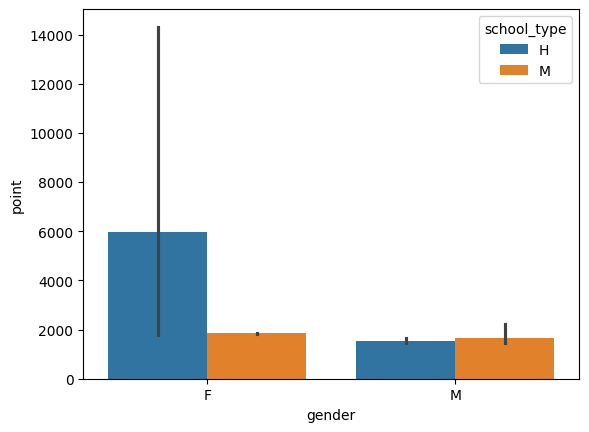

In [ ]:
sns.barplot(x='gender', y='point', hue='school_type', data=user_school_data)


학생을 성별, 고등학교-중학교로 범주화해서 각각의 point를 살펴본 결과

->  **고등학교 여학생의 포인트가 압도적으로 높은것을 확인할 수 있었다. ***

point: 포인트 라고 컬럼 설명에 작성되어있는데 이게 과금을 해서 얻을 수 있는 일종의 캐시?같은거일까?

### 포인트에 대해서 할 수 있는 가설 & 분석
가설 : 사용자들의 학교에 사람이 많을 수록 그룹이 활성화되어 더 많은 과금을 했을거임.
분석 방법 :
1. 학교 평균 학생 수 계산
2. 평균 이상인 그룹 & 그렇지 않은 학교 그룹을 나누어 과금을 얼마나 했는지 확인 -> 시각화  

In [ ]:
# 필요한 데이터 추출
data = user_school_data[['school_id', 'student_count', 'point']].dropna()

# 학교별 평균 학생 수 계산
school_avg_students = data.groupby('school_id')['student_count'].mean()

# 전체 평균 학생 수 계산
overall_avg_students = school_avg_students.mean()

# 평균 이상/미만 그룹 생성
data['student_group'] = data['student_count'].apply(
    lambda x: 'High Population' if x >= overall_avg_students else 'Low Population'
)

# 각 학교별 평균 포인트 계산
school_avg_points = data.groupby('school_id')['point'].mean().reset_index()
data = data.merge(school_avg_points, on='school_id', suffixes=('', '_avg'))


In [ ]:
# 그룹별 평균 포인트 계산
group_point_stats = data.groupby('student_group')['point_avg'].agg(['mean', 'count']).reset_index()
group_point_stats.rename(columns={'mean': 'average_points'}, inplace=True)

print(group_point_stats)


     student_group  average_points   count
0  High Population     3413.965426  541710
1   Low Population     1458.708790  135277


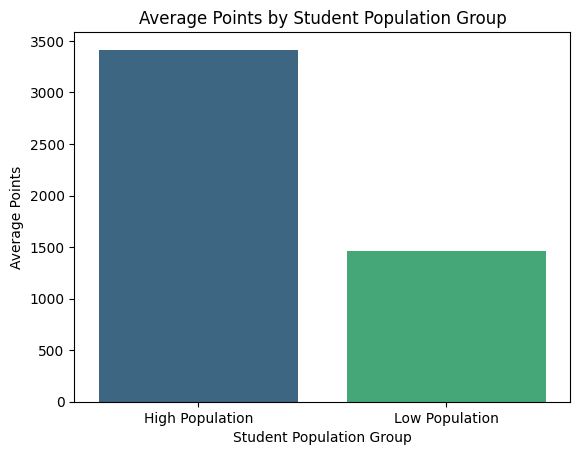

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 평균 포인트 시각화
sns.barplot(x='student_group', y='average_points', data=group_point_stats, palette='viridis')
plt.title('Average Points by Student Population Group')
plt.xlabel('Student Population Group')
plt.ylabel('Average Points')
plt.show()


결과 : 확인 결과 실제로 평균 이용자가 많은 그룹이 평균적으로 더 많이 과금을 하는것으로 보였다.

그렇다면 이용고객이 적은 경우에 대해서 어떤 방식으로 .. 해야지만 사용자들의 과금을 유도할 수 있을까

In [ ]:
polls_questionset.head()

,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477


In [ ]:
polls_questionpiece.head()

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0


polls_questionset 에 있는 question_piece_id_list 안의 값 = polls_questionpiece안에 있는 id값

In [ ]:
target_ids = [998588, 998589, 998590, 998591, 998592, 99859]

filtered_questions = polls_questionpiece[polls_questionpiece['id'].isin(target_ids)]
print(filtered_questions)

        id  is_voted           created_at  question_id  is_skipped
10  998588         1  2023-04-28 12:28:07          237           0
11  998589         1  2023-04-28 12:28:07          138           0
12  998590         1  2023-04-28 12:28:07          184           0
13  998591         1  2023-04-28 12:28:07          157           0
14  998592         1  2023-04-28 12:28:07          276           0


In [ ]:
polls_question.head()

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"이 사람으로 한 번 살아보고 싶다"" 하는 사람은?""",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55


In [ ]:
target_ids = [237,138,184,157,276]
filtered_questions = polls_question[polls_question['id'].isin(target_ids)]
print(filtered_questions)

      id                  question_text           created_at
39   138      첫 키스를 가장 먼저 해봤을 것 같은 사람은?  2023-03-31 15:23:13
58   157         나에게 항상 응원과 용기를 주는 사람은?  2023-03-31 15:23:22
85   184              랩을 제일 잘할것 같은 사람은?  2023-04-01 11:09:14
138  237  이별 후 자기가 먼저 화해메시지 보낼 것 같은 사람?  2023-04-01 11:09:25
177  276     10년 후 미래에 같이 여행가보고 싶은 사람은?  2023-04-01 11:09:33


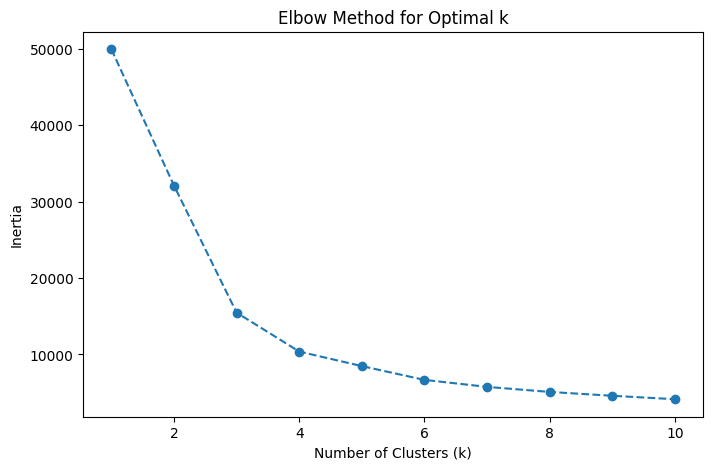

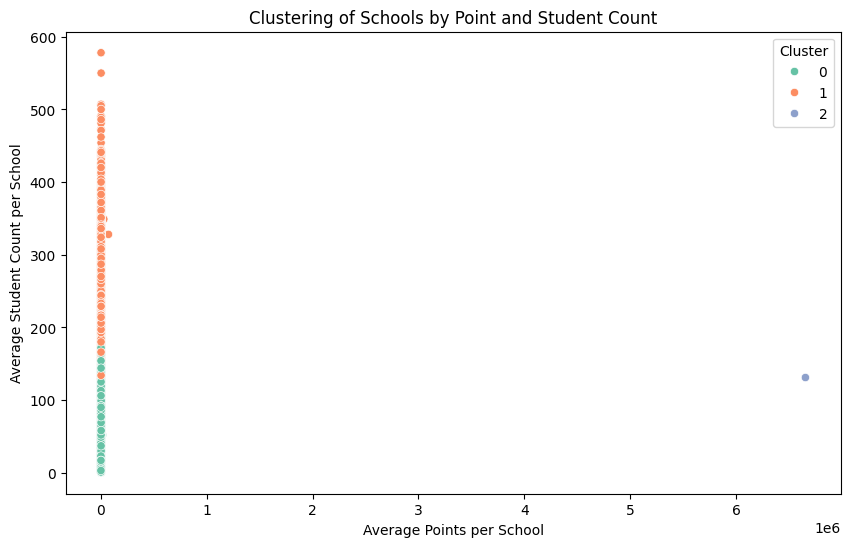

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# school_id를 기준으로 그룹화하여 요약 통계 계산
school_stats = user_school_data.groupby('school_id').agg({
    'point': ['mean', 'sum', 'std'],
    'student_count': ['mean', 'sum'],
    'class_num': ['mean', 'sum'],
    'pending_votes': ['mean', 'sum']
}).reset_index()

# 다중 컬럼명을 단일 레벨로 변환
school_stats.columns = ['_'.join(col).strip() for col in school_stats.columns.values]

# 군집화를 위한 데이터 준비
X = school_stats.drop(columns=['school_id_'])

# 결측값 처리 및 데이터 스케일링
X.fillna(0, inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 클러스터 수 탐색 (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 클러스터링 수행 (k=3로 예시)
kmeans = KMeans(n_clusters=3, random_state=42)
school_stats['cluster'] = kmeans.fit_predict(X_scaled)

# 각 클러스터별 데이터 특성 확인
cluster_summary = school_stats.groupby('cluster').mean()

# 클러스터별 시각화 (예: point_mean vs. student_count_mean)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=school_stats, x='point_mean', y='student_count_mean', hue='cluster', palette='Set2')
plt.title('Clustering of Schools by Point and Student Count')
plt.xlabel('Average Points per School')
plt.ylabel('Average Student Count per School')
plt.legend(title='Cluster')
plt.show()


## 고객 활성화 EDA

In [ ]:

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# 기본 경로 설정
base_path = '/content/drive/MyDrive/Colab Notebooks/final_project/'

# 각 CSV 파일을 읽어와 데이터프레임으로 저장
accounts_attendance = pd.read_csv(base_path + 'accounts_attendance.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
accounts_attendance.head()

,id,attendance_date_list,user_id
0,1,"['2023-05-27', '2023-05-28', '2023-05-29', '20...",1446852
1,2,"['2023-05-27', '2023-05-29', '2023-05-30', '20...",1359398
2,3,"['2023-05-27', '2023-05-29', '2023-05-30', '20...",1501542
3,4,"['2023-05-27', '2023-05-28', '2023-05-29', '20...",1507767
4,5,"['2023-05-27', '2023-05-28', '2023-05-29', '20...",1287453


In [ ]:
import pandas as pd
import numpy as np

# 출석 날짜 리스트를 datetime 형식으로 변환
def parse_dates(date_list):
    # 빈 리스트 처리
    if isinstance(date_list, str):
        try:
            # 날짜 형식이 잘못된 경우 예외 처리
            dates = [pd.to_datetime(date.strip()) for date in date_list.replace("'", "").replace("[", "").replace("]", "").split(',')]
            return dates
        except Exception as e:
            print(f"Error parsing dates: {e}")
            return []
    return []

# 출석 지표 계산 함수
def calculate_attendance_metrics(dates):
    if len(dates) == 0:
        return 0, 0, 0  # 총 출석일, 최대 연속 출석일, 주간 출석률

    dates = sorted(dates)
    total_attendance = len(dates)
    max_streak = 1
    current_streak = 1
    weekly_attendance = {}  # {week_number: 출석 일수}

    for i in range(1, len(dates)):
        delta = (dates[i] - dates[i - 1]).days

        # 연속 출석 계산
        if delta == 1:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 1

        # 주간 출석 계산
        week_number = dates[i].isocalendar()[1]  # 주 번호
        weekly_attendance[week_number] = weekly_attendance.get(week_number, 0) + 1

    average_weekly_attendance = np.mean(list(weekly_attendance.values()))
    return total_attendance, max_streak, average_weekly_attendance


# 출석 날짜 리스트를 datetime 형식으로 변환
accounts_attendance['attendance_date_list'] = accounts_attendance['attendance_date_list'].apply(parse_dates)

# 유저별 출석 지표 계산
accounts_attendance[['total_days', 'max_streak', 'avg_weekly_attendance']] = accounts_attendance[
    'attendance_date_list'
].apply(lambda x: pd.Series(calculate_attendance_metrics(x)))

print(accounts_attendance)


            id                               attendance_date_list  user_id  \
0            1  [2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...  1446852   
1            2  [2023-05-27 00:00:00, 2023-05-29 00:00:00, 202...  1359398   
2            3  [2023-05-27 00:00:00, 2023-05-29 00:00:00, 202...  1501542   
3            4  [2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...  1507767   
4            5  [2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...  1287453   
...        ...                                                ...      ...   
349632  360501                                              [NaT]   897005   
349633  360502                              [2024-05-09 00:00:00]  1407059   
349634  360503                              [2024-05-09 00:00:00]  1583727   
349635  360504                              [2024-05-09 00:00:00]  1392372   
349636  360505                              [2024-05-09 00:00:00]  1583730   

        total_days  max_streak  avg_weekly_attendance  
0      

요일별 출석 패턴 분석

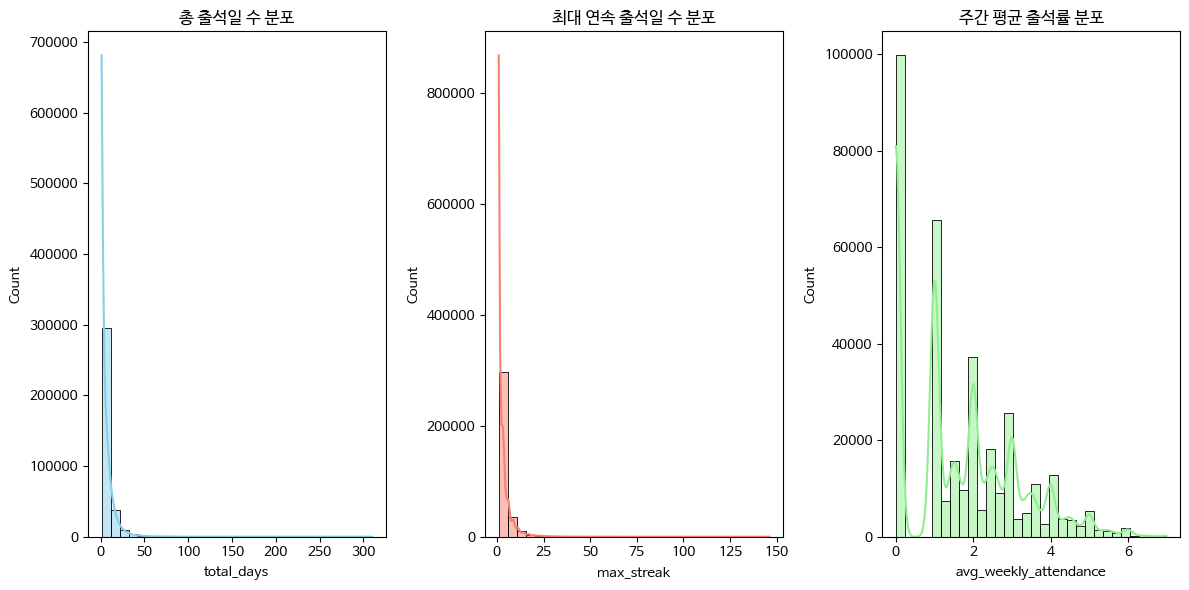

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# NaN 값 처리 (NaN을 0으로 대체)
accounts_attendance['avg_weekly_attendance'].fillna(0, inplace=True)

# 전체 유저의 출석 지표 분포 확인
plt.figure(figsize=(12, 6))

# 'total_days' 분포
plt.subplot(1, 3, 1)
sns.histplot(accounts_attendance['total_days'], kde=True, color='skyblue', bins=30)
plt.title('총 출석일 수 분포')

# 'max_streak' 분포
plt.subplot(1, 3, 2)
sns.histplot(accounts_attendance['max_streak'], kde=True, color='salmon', bins=30)
plt.title('최대 연속 출석일 수 분포')

# 'avg_weekly_attendance' 분포
plt.subplot(1, 3, 3)
sns.histplot(accounts_attendance['avg_weekly_attendance'], kde=True, color='lightgreen', bins=30)
plt.title('주간 평균 출석률 분포')

plt.tight_layout()
plt.show()


In [ ]:
# 'weekday' 컬럼에 있는 리스트의 각 요일 숫자를 요일 이름으로 변환
accounts_attendance['weekday_name'] = accounts_attendance['weekday'].apply(
    lambda x: [weekday_mapping[day] for day in x if not pd.isna(day)] if isinstance(x, list) else []
)

# 결과 확인
print(accounts_attendance[['weekday', 'weekday_name']].head())


                                             weekday  \
0            [5, 6, 0, 1, 5, 1, 0, 3, 0, 0, 1, 3, 1]   
1  [5, 0, 1, 4, 5, 0, 2, 3, 5, 6, 3, 4, 5, 6, 0, ...   
2                        [5, 0, 1, 2, 3, 4, 1, 2, 2]   
3  [5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, ...   
4  [5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, ...   

                                        weekday_name  
0  [토요일, 일요일, 월요일, 화요일, 토요일, 화요일, 월요일, 목요일, 월요일, ...  
1  [토요일, 월요일, 화요일, 금요일, 토요일, 월요일, 수요일, 목요일, 토요일, ...  
2      [토요일, 월요일, 화요일, 수요일, 목요일, 금요일, 화요일, 수요일, 수요일]  
3  [토요일, 일요일, 월요일, 화요일, 수요일, 목요일, 금요일, 토요일, 일요일, ...  
4  [토요일, 일요일, 월요일, 화요일, 수요일, 목요일, 금요일, 토요일, 일요일, ...  


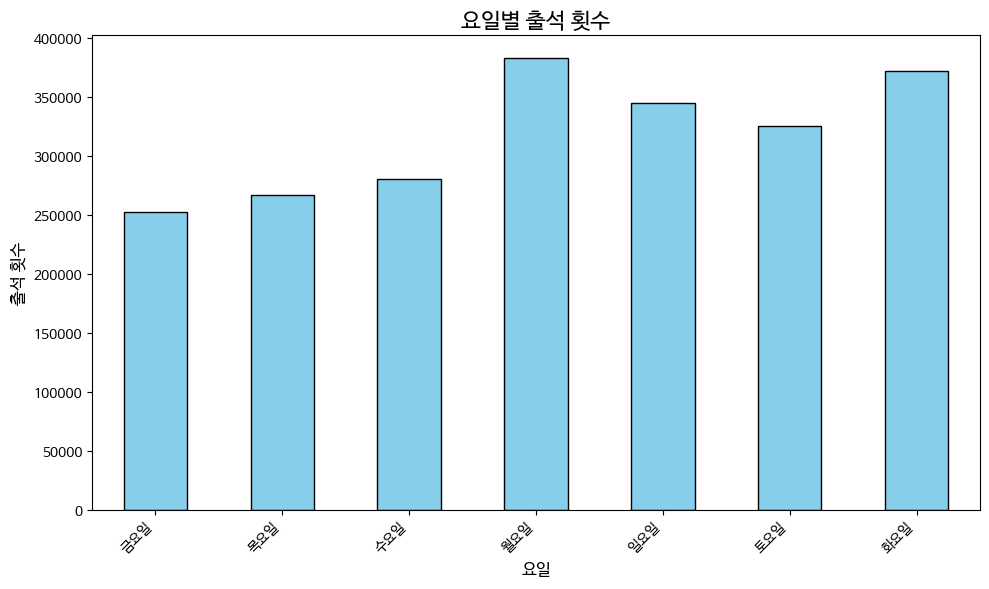

In [ ]:
import matplotlib.pyplot as plt

# 요일별 출석 횟수 계산
weekday_counts = accounts_attendance['weekday_name'].explode().value_counts()

# 시각화
plt.figure(figsize=(10, 6))
weekday_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# 그래프 제목 및 레이블 설정
plt.title('요일별 출석 횟수', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('출석 횟수', fontsize=12)

# 요일 레이블을 가독성 좋게 표시
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 그래프 출력
plt.show()


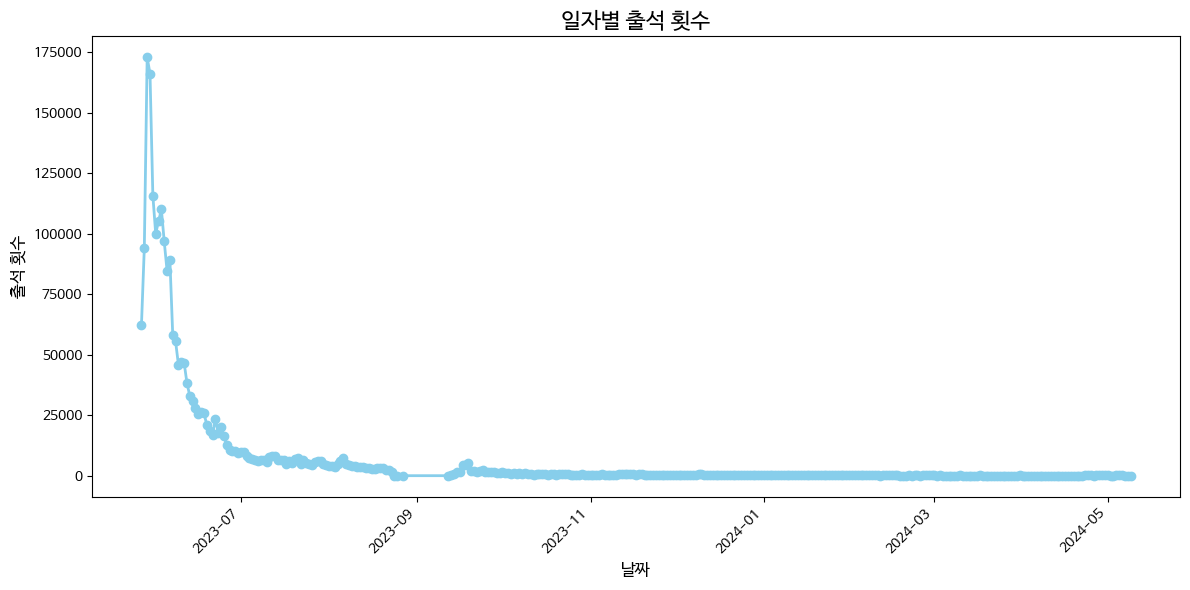

In [ ]:
import matplotlib.pyplot as plt

# 출석 날짜별 출석 횟수 계산
attendance_per_day = accounts_attendance.explode('attendance_date_list')['attendance_date_list'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
attendance_per_day.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)

# 그래프 제목 및 레이블 설정
plt.title('일자별 출석 횟수', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('출석 횟수', fontsize=12)

# x축 날짜 포맷팅
plt.xticks(rotation=45, ha='right')

# 그래프 출력
plt.tight_layout()
plt.show()


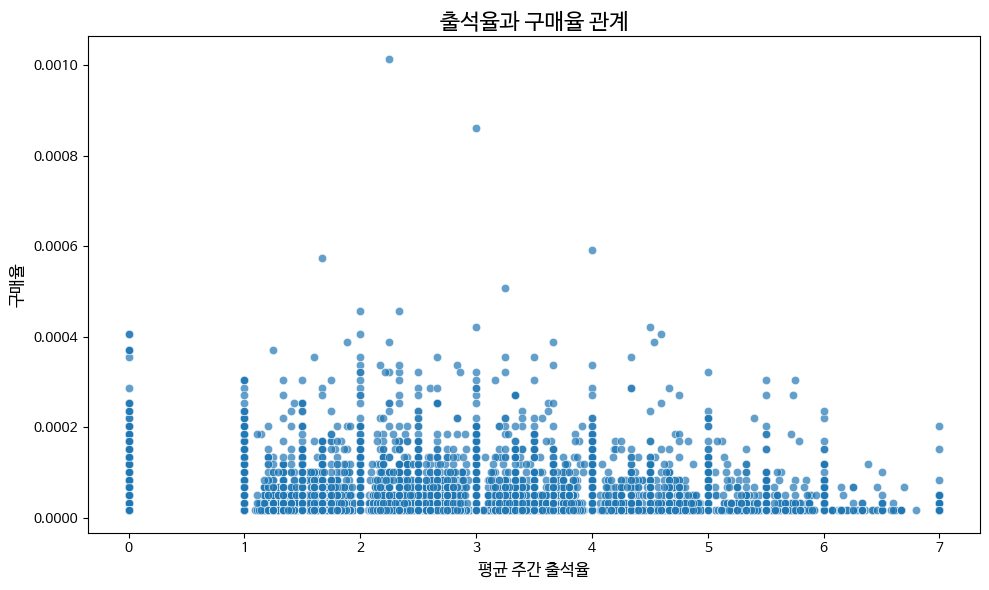

출석율과 구매율 간의 상관계수: 0.04203201786694622


In [ ]:
# 1. 구매율 계산 (예시: 유저별 구매 횟수)
# accounts_paymenthistory 테이블에서 유저별 구매 횟수 계산
purchase_count = accounts_paymenthistory.groupby('user_id')['productId'].count()

# 총 구매자 수
total_users = accounts_paymenthistory['user_id'].nunique()

# 구매율 계산: 특정 유저가 구매한 비율
purchase_rate = purchase_count / total_users

# 2. 출석율 계산 (예시: 평균 출석율 활용)
attendance_rate = accounts_attendance[['user_id', 'avg_weekly_attendance']]

# 3. 두 테이블 병합
merged_data = pd.merge(attendance_rate, purchase_rate, on='user_id', how='inner', suffixes=('_attendance', '_purchase'))

# 4. 분석: 출석율과 구매율 간의 관계 분석
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도로 출석율과 구매율 관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='avg_weekly_attendance', y='productId', alpha=0.7)
plt.title('출석율과 구매율 관계', fontsize=16)
plt.xlabel('평균 주간 출석율', fontsize=12)
plt.ylabel('구매율', fontsize=12)
plt.tight_layout()
plt.show()

# 출석율과 구매율 간 상관계수 계산
correlation = merged_data['avg_weekly_attendance'].corr(merged_data['productId'])
print(f'출석율과 구매율 간의 상관계수: {correlation}')


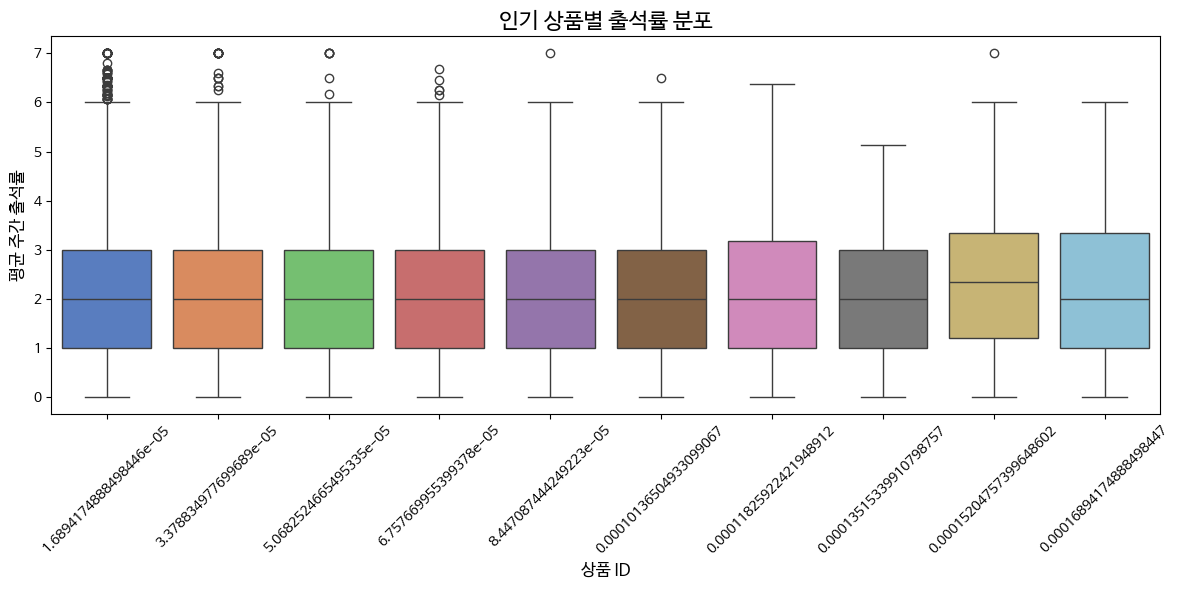

In [ ]:
# 상품별 구매 데이터와 출석률 간 상관 관계 계산
product_attendance_corr = merged_data.groupby('productId')['avg_weekly_attendance'].mean()

# 상위 인기 상품(구매가 많은 상품) 상위 10개 확인
top_products = merged_data['productId'].value_counts().head(10).index
top_product_data = merged_data[merged_data['productId'].isin(top_products)]

# 인기 상품별 출석률 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_product_data, x='productId', y='avg_weekly_attendance', palette='muted')
plt.title('인기 상품별 출석률 분포', fontsize=16)
plt.xlabel('상품 ID', fontsize=12)
plt.ylabel('평균 주간 출석률', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
accounts_paymenthistory.head()

,id,productId,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081


In [ ]:
# 가장 많이 팔린 productId와 해당 수량 계산
most_sold_product = accounts_paymenthistory['productId'].value_counts().idxmax()
most_sold_count = accounts_paymenthistory['productId'].value_counts().max()

# 결과 출력
print(f"가장 많이 팔린 productId: {most_sold_product}")
print(f"판매 수량: {most_sold_count}")

# 상위 10개 인기 상품도 함께 출력
top_10_products = accounts_paymenthistory['productId'].value_counts().head(10)
print("\n상위 10개 인기 상품과 수량:")
print(top_10_products)


가장 많이 팔린 productId: heart.777
판매 수량: 57873

상위 10개 인기 상품과 수량:
productId
heart.777     57873
heart.1000    19309
heart.200     15822
heart.4000     2136
Name: count, dtype: int64


In [ ]:
accounts_attendance.head()

,id,attendance_date_list,user_id,total_days,max_streak,avg_weekly_attendance,weekday,weekday_name
0,1,"[2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...",1446852,13.0,4.0,1.500000,"[5, 6, 0, 1, 5, 1, 0, 3, 0, 0, 1, 3, 1]","[토요일, 일요일, 월요일, 화요일, 토요일, 화요일, 월요일, 목요일, 월요일, ..."
1,2,"[2023-05-27 00:00:00, 2023-05-29 00:00:00, 202...",1359398,33.0,9.0,2.909091,"[5, 0, 1, 4, 5, 0, 2, 3, 5, 6, 3, 4, 5, 6, 0, ...","[토요일, 월요일, 화요일, 금요일, 토요일, 월요일, 수요일, 목요일, 토요일, ..."
2,3,"[2023-05-27 00:00:00, 2023-05-29 00:00:00, 202...",1501542,9.0,5.0,2.666667,"[5, 0, 1, 2, 3, 4, 1, 2, 2]","[토요일, 월요일, 화요일, 수요일, 목요일, 금요일, 화요일, 수요일, 수요일]"
3,4,"[2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...",1507767,30.0,18.0,4.833333,"[5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, ...","[토요일, 일요일, 월요일, 화요일, 수요일, 목요일, 금요일, 토요일, 일요일, ..."
4,5,"[2023-05-27 00:00:00, 2023-05-28 00:00:00, 202...",1287453,31.0,30.0,5.000000,"[5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, ...","[토요일, 일요일, 월요일, 화요일, 수요일, 목요일, 금요일, 토요일, 일요일, ..."


### 차단 기록과 유저 활동 비교

In [ ]:
# accounts_attendance의 컬럼명 확인
print(accounts_attendance.columns)


Index(['id', 'attendance_date_list', 'user_id'], dtype='object')


In [ ]:
# 'attendance_date_list'를 기준으로 주별 출석 횟수 계산
# 'attendance_date_list'가 리스트 형태이므로, 이를 7일씩 주 단위로 묶어서 출석률을 계산할 수 있습니다.

# 출석일 리스트를 날짜순으로 정렬하여 주별로 그룹화
accounts_attendance['attendance_date_list'] = accounts_attendance['attendance_date_list'].apply(lambda x: sorted(x) if isinstance(x, list) else [])

# 주별 출석률 계산
def calculate_weekly_attendance(attendance_dates):
    weekly_attendance = []
    for i in range(0, len(attendance_dates), 7):  # 7일씩 나눠서 주 단위로 계산
        week = attendance_dates[i:i+7]
        weekly_attendance.append(len(week) / 7)  # 주당 출석률 계산
    return weekly_attendance

# 'avg_weekly_attendance' 컬럼에 주별 출석률 리스트 추가
accounts_attendance['avg_weekly_attendance'] = accounts_attendance['attendance_date_list'].apply(calculate_weekly_attendance)

# 주별 출석률을 평균하여 'avg_weekly_attendance' 컬럼에 저장 (출석률이 여러 번 나올 수 있기 때문에 평균값을 계산)
accounts_attendance['avg_weekly_attendance'] = accounts_attendance['avg_weekly_attendance'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

# 출석률 소수점 3자리로 반올림
accounts_attendance['avg_weekly_attendance'] = accounts_attendance['avg_weekly_attendance'].round(3)

# 결과 확인
print(accounts_attendance[['user_id', 'avg_weekly_attendance']].head())


   user_id  avg_weekly_attendance
0  1446852                      0
1  1359398                      0
2  1501542                      0
3  1507767                      0
4  1287453                      0


In [ ]:
# accounts_blockrecord 데이터프레임 불러오기
# 차단된 유저 목록 추출
blocked_users = accounts_blockrecord['user_id'].unique()

# 차단된 유저와 차단되지 않은 유저의 출석률 비교
blocked_attendance = accounts_attendance[accounts_attendance['user_id'].isin(blocked_users)]
non_blocked_attendance = accounts_attendance[~accounts_attendance['user_id'].isin(blocked_users)]

# 각 그룹의 평균 출석률 계산
blocked_avg_attendance = blocked_attendance['avg_weekly_attendance'].mean()
non_blocked_avg_attendance = non_blocked_attendance['avg_weekly_attendance'].mean()

print(f"차단된 유저 평균 출석률: {blocked_avg_attendance}")
print(f"차단되지 않은 유저 평균 출석률: {non_blocked_avg_attendance}")


차단된 유저 평균 출석률: 0.0
차단되지 않은 유저 평균 출석률: 0.0


In [ ]:
import pandas as pd



# 투표율과 스킵율 계산
vote_rate = polls_questionpiece["is_voted"].mean()  # 전체 투표율
skip_rate = polls_questionpiece["is_skipped"].mean()  # 전체 스킵율

# 질문별 투표율과 스킵율 계산
question_response_stats = polls_questionpiece.groupby("question_id").agg(
    vote_rate=("is_voted", "mean"),
    skip_rate=("is_skipped", "mean"),
    total_responses=("question_id", "count")
).reset_index()

print(f"전체 투표율: {vote_rate:.2%}")
print(f"전체 스킵율: {skip_rate:.2%}")
print(question_response_stats.head())  # 상위 5개 데이터 출력


전체 투표율: 96.30%
전체 스킵율: 0.09%
   question_id  vote_rate  skip_rate  total_responses
0           99   0.983759   0.000000             1724
1          100   0.979839   0.000000             1736
2          101   0.981632   0.000000             1851
3          102   0.985316   0.000000             1975
4          103   0.980180   0.000601             1665


수상할정도로 높은 투표율..
확인 결과 -> is_skipped ==1 일때 is_voted 또한 1인걸로 볼 수 있었음.


### 신고데이터 분석
- 신고가 많이 접수된 질문 분석


In [ ]:


# 신고된 질문별 신고 횟수 분석
report_counts = polls_questionreport.groupby("question_id")["user_id"].count().reset_index()
report_counts.columns = ["question_id", "report_count"]

# 신고가 가장 많은 상위 10개 질문
top_reported_questions = report_counts.sort_values(by="report_count", ascending=False).head(20)

print(top_reported_questions)


     question_id  report_count
12           111           988
311          410           803
299          398           660
325          424           533
206          305           493
465          564           338
45           144           307
420          519           283
395          494           258
380          479           239
135          234           236
39           138           220
439          538           218
10           109           209
377          476           209
317          416           205
333          432           203
366          465           202
9            108           196
334          433           196


📌 전체 질문의 평균 신고 횟수: 16.40


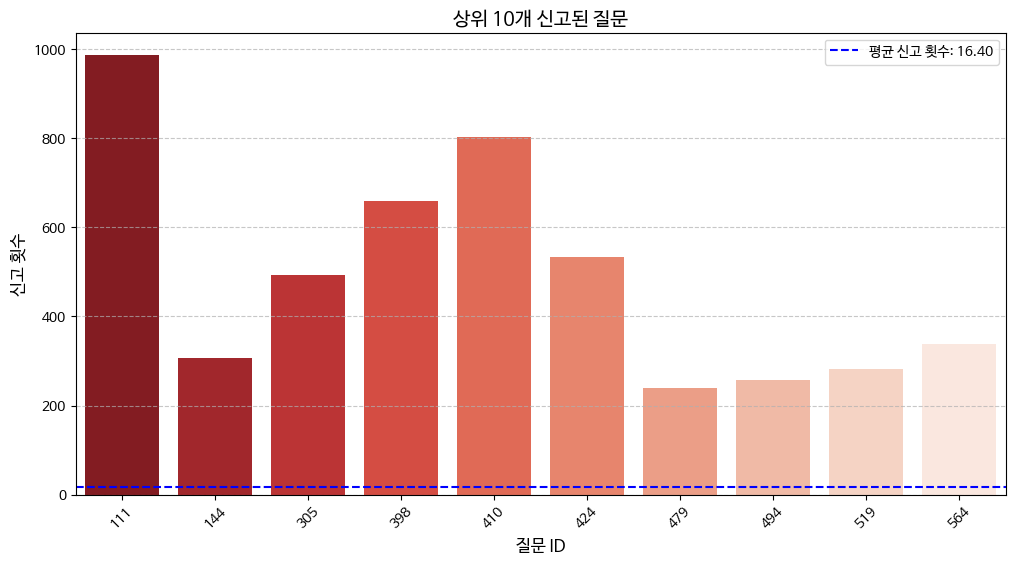

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 신고된 질문별 신고 횟수 계산
report_counts = polls_questionreport.groupby("question_id")["user_id"].count().reset_index()
report_counts.columns = ["question_id", "report_count"]

# 전체 평균 신고 횟수 계산
average_report_count = report_counts["report_count"].mean()
print(f"📌 전체 질문의 평균 신고 횟수: {average_report_count:.2f}")

# 신고가 가장 많은 상위 10개 질문
top_reported_questions = report_counts.sort_values(by="report_count", ascending=False).head(10)

# 시각화 - 신고 횟수가 많은 질문 (X축: 질문 ID, Y축: 신고 횟수)
plt.figure(figsize=(12, 6))
sns.barplot(x="question_id", y="report_count", data=top_reported_questions, palette="Reds_r")

# 평균 신고 횟수 라인 추가
plt.axhline(average_report_count, color="blue", linestyle="dashed", label=f"평균 신고 횟수: {average_report_count:.2f}")

# 그래프 스타일 설정
plt.xticks(rotation=45)  # X축 라벨 회전
plt.xlabel("질문 ID", fontsize=12)
plt.ylabel("신고 횟수", fontsize=12)
plt.title("상위 10개 신고된 질문", fontsize=14)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [ ]:
polls_question.head()

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"이 사람으로 한 번 살아보고 싶다"" 하는 사람은?""",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55


In [ ]:
polls_questionpiece.head()

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0


In [ ]:
polls_questionreport.head()

,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922


In [ ]:
polls_questionset.head()

,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477


In [ ]:
polls_questionreport.shape[0]

51424

In [ ]:
polls_question.shape[0]

5025

In [ ]:
# polls_questionreport와 polls_question을 question_id 기준으로 병합
merged_report_df = polls_questionreport.merge(
    polls_question,
    left_on="question_id",  # 신고 데이터의 question_id
    right_on="id",  # 질문 데이터의 id
    how="inner"  # 일치하는 데이터만 포함
)

# 결과 확인
print(merged_report_df.head())


   id_x                reason         created_at_x  question_id  user_id  \
0     1           이 질문은 재미없어요  2023-04-19 06:20:35          250   837556   
1     2           이 질문은 재미없어요  2023-04-19 06:58:09          113   837672   
2     3       불쾌한 내용이 포함되어 있음  2023-04-19 06:58:17          113   837672   
3     4  어떻게 이런 생각을? 이 질문 최고!  2023-04-19 08:12:42          119   837922   
4     5  어떻게 이런 생각을? 이 질문 최고!  2023-04-19 08:12:50          119   837922   

   id_y            question_text         created_at_y  
0   250     와이드한 느낌이 잘 어울리는 사람은?  2023-04-01 11:09:27  
1   113     첫인상과 아예 반대라고 느낀 사람은?  2023-03-31 15:23:00  
2   113     첫인상과 아예 반대라고 느낀 사람은?  2023-03-31 15:23:00  
3   119  시간 약속을 제일 잘 지킬것 같은 사람은?  2023-03-31 15:23:02  
4   119  시간 약속을 제일 잘 지킬것 같은 사람은?  2023-03-31 15:23:02  


In [ ]:
merged_report_df.shape[0]

51424

제대로 merge된것을 확인할수 있음


In [ ]:
unique_question_count = merged_report_df["question_id"].nunique()
print(unique_question_count)


3135


신고당한 총 question은 3135개로 나왔다.

#### 신고 집중도 분석
- 특정 질문에서 유독 많은 신고가 일어나는지. 고르게 신고가 되는지 확인

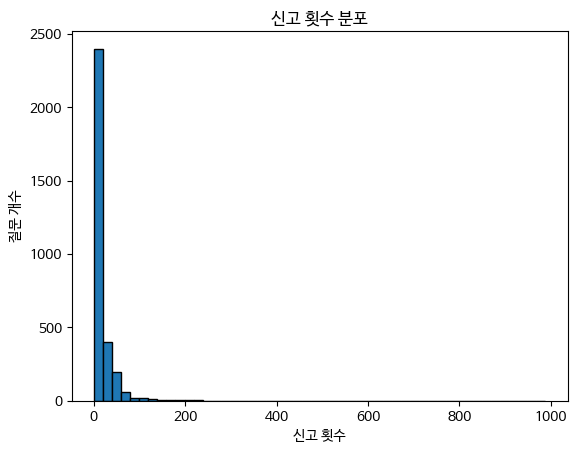

In [ ]:
import matplotlib.pyplot as plt

plt.hist(merged_report_df["question_id"].value_counts(), bins=50, edgecolor="black")
plt.xlabel("신고 횟수")
plt.ylabel("질문 개수")
plt.title("신고 횟수 분포")
plt.show()


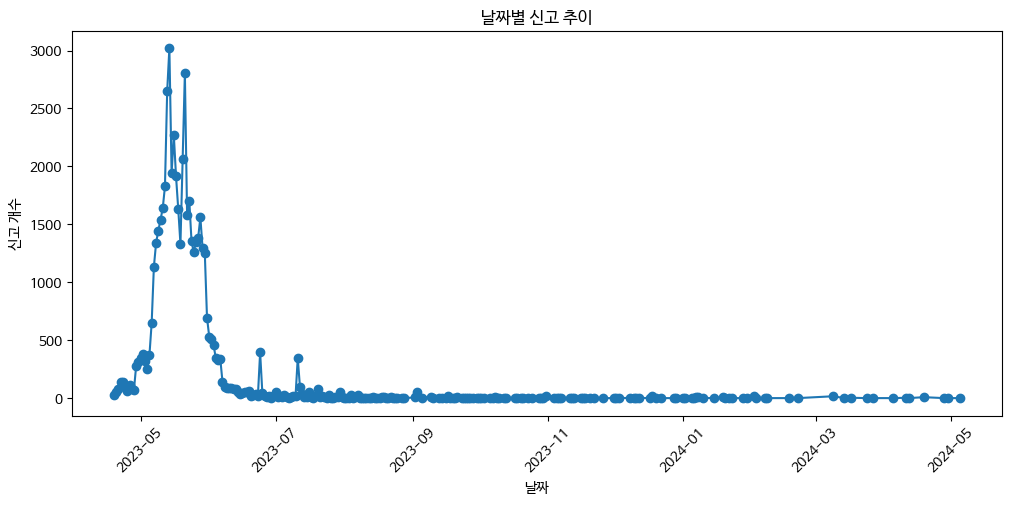

In [ ]:
polls_questionreport["created_at"] = pd.to_datetime(polls_questionreport["created_at"])
daily_reports = polls_questionreport.groupby(polls_questionreport["created_at"].dt.date).size()

plt.figure(figsize=(12, 5))
plt.plot(daily_reports.index, daily_reports.values, marker="o", linestyle="-")
plt.xlabel("날짜")
plt.ylabel("신고 개수")
plt.title("날짜별 신고 추이")
plt.xticks(rotation=45)
plt.show()


위에있던 질문 생성 테이블과 비교했을때 신고된 날짜 또한 질문 생성일자와 비슷하게 진행되는것 같음
아무래도 그때 사람들이 많이 활동을 했으니깐..


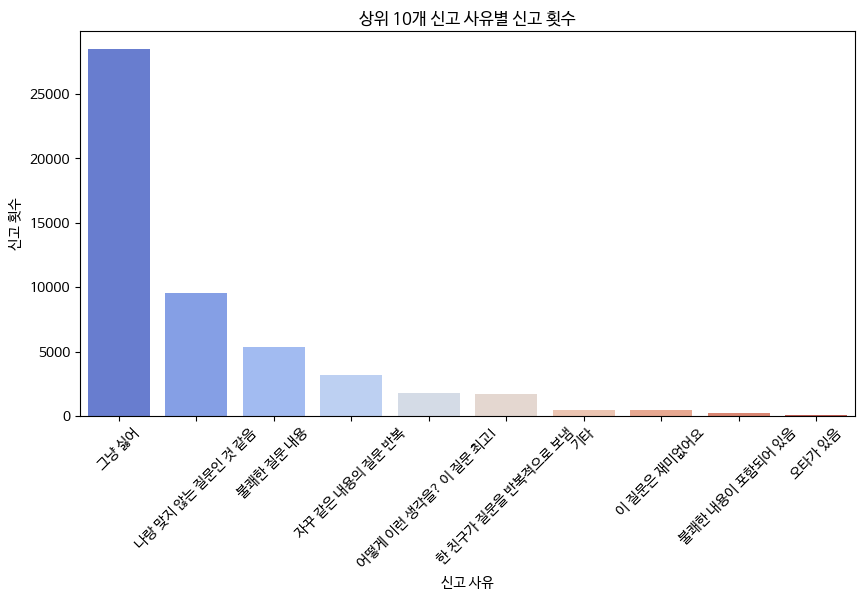

reason
그냥 싫어                   28446
나랑 맞지 않는 질문인 것 같음        9541
불쾌한 질문 내용                5386
자꾸 같은 내용의 질문 반복          3202
어떻게 이런 생각을? 이 질문 최고!     1821
한 친구가 질문을 반복적으로 보냄       1701
기타                        480
이 질문은 재미없어요               471
불쾌한 내용이 포함되어 있음           250
오타가 있음                     68
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 신고 사유별 개수 집계
reason_counts = polls_questionreport["reason"].value_counts()

# 상위 신고 사유 10개 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=reason_counts.index[:10], y=reason_counts.values[:10], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("신고 사유")
plt.ylabel("신고 횟수")
plt.title("상위 10개 신고 사유별 신고 횟수")
plt.show()

# 신고 사유별 개수 출력
print(reason_counts.head(10))


In [ ]:
# 신고된 질문별 신고 횟수 집계
top_reported_questions = polls_questionreport["question_id"].value_counts().head(10)

# 질문 내용과 신고 횟수 병합
top_reported_df = polls_question[polls_question["id"].isin(top_reported_questions.index)].copy()
top_reported_df["report_count"] = top_reported_df["id"].map(top_reported_questions)

# 상위 10개 신고된 질문 출력
print(top_reported_df[["question_text", "report_count"]].sort_values(by="report_count", ascending=False))


                  question_text  report_count
12             마스크가 잘 어울리는 사람은?           988
311     발냄새가 호두과자 냄새일 것 같은 사람은?           803
299              등빨이 가장 좋은 사람은?           660
325              어깨가 가장 넓은 사람은?           533
206         먹방을 가장 잘할 것 같은 사람은?           493
465           설레면 콧구멍이 커지는 친구는?           338
45        발냄새가 가장 향긋할 것 같은 사람은?           307
420    콧수염을 기르면 잘 어울릴 것 같은 사람은?           283
395  먹방 찍으면 100만 유튜버가 될 것 같은 친구           258
380            치킨 중독인 것 같은 사람은?           239


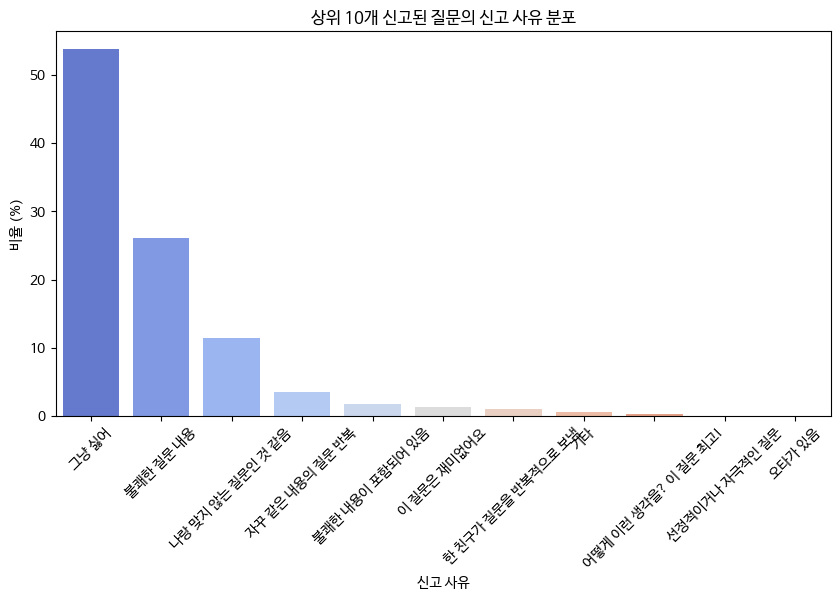

reason
그냥 싫어                   53.733170
불쾌한 질문 내용               26.132191
나랑 맞지 않는 질문인 것 같음       11.485108
자꾸 같은 내용의 질문 반복          3.549572
불쾌한 내용이 포함되어 있음          1.733986
이 질문은 재미없어요              1.346389
한 친구가 질문을 반복적으로 보냄       0.999592
기타                       0.550796
어떻게 이런 생각을? 이 질문 최고!     0.367197
선정적이거나 자극적인 질문           0.061200
Name: proportion, dtype: float64


In [ ]:
# 상위 10개 질문의 신고 데이터 필터링
top_reported_question_ids = top_reported_df["id"].tolist()
filtered_reports = polls_questionreport[polls_questionreport["question_id"].isin(top_reported_question_ids)]

# 신고 사유별 비율 계산
top_reported_reason_counts = filtered_reports["reason"].value_counts(normalize=True) * 100

# 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=top_reported_reason_counts.index, y=top_reported_reason_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("신고 사유")
plt.ylabel("비율 (%)")
plt.title("상위 10개 신고된 질문의 신고 사유 분포")
plt.show()

# 신고 사유 비율 출력
print(top_reported_reason_counts.head(10))


<Figure size 1200x600 with 0 Axes>

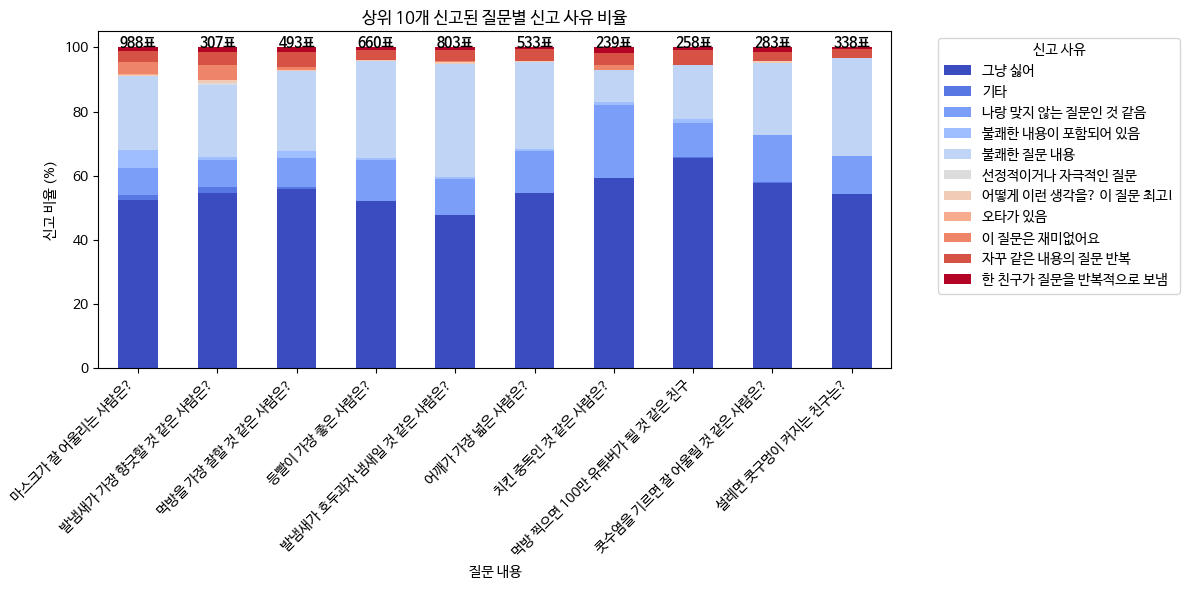

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 상위 10개 신고된 질문별 신고 횟수 집계
top_reported_questions = polls_questionreport["question_id"].value_counts().head(10)

# 상위 신고된 질문과 신고 횟수 병합
top_reported_df = polls_question[polls_question["id"].isin(top_reported_questions.index)].copy()
top_reported_df["report_count"] = top_reported_df["id"].map(top_reported_questions)

# 상위 10개 신고된 질문의 신고 데이터 필터링
filtered_reports = polls_questionreport[polls_questionreport["question_id"].isin(top_reported_df["id"])]

# 신고 사유별 개수 집계
reason_counts_per_question = filtered_reports.groupby(["question_id", "reason"]).size().reset_index(name="count")

# 각 질문별 신고 총합 구하기
total_reports_per_question = reason_counts_per_question.groupby("question_id")["count"].sum().reset_index()
total_reports_per_question.rename(columns={"count": "total_reports"}, inplace=True)

# 각 신고 사유의 비율 계산
reason_counts_per_question = reason_counts_per_question.merge(total_reports_per_question, on="question_id")
reason_counts_per_question["percentage"] = (reason_counts_per_question["count"] / reason_counts_per_question["total_reports"]) * 100

# 데이터를 pivot하여 시각화에 맞게 변환
pivot_df = reason_counts_per_question.pivot(index="question_id", columns="reason", values="percentage").fillna(0)

# 질문 ID를 질문 내용으로 변환
pivot_df = pivot_df.rename(index=top_reported_df.set_index("id")["question_text"])

# 시각화 (Stacked Bar Chart)
plt.figure(figsize=(12, 6))
pivot_df.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))

plt.xlabel("질문 내용")
plt.ylabel("신고 비율 (%)")
plt.title("상위 10개 신고된 질문별 신고 사유 비율")
plt.xticks(rotation=45, ha="right")
plt.legend(title="신고 사유", bbox_to_anchor=(1.05, 1), loc="upper left")

# 총 신고 횟수 표시
for i, question in enumerate(pivot_df.index):
    total_reports = total_reports_per_question[total_reports_per_question["question_id"] == top_reported_df[top_reported_df["question_text"] == question]["id"].values[0]]["total_reports"].values[0]
    plt.text(i, 100, f"{total_reports}표", ha="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()


#### 신고된 질문 vs 신고되지 않은 질문의 생성 시점
특정 시점에 생성된 질문이 신고율이 높은지 ?
- day에 따라서 확인
- 시간대에 따라서 확인 : 00시에 많은 신고율을 보인다. 만약 이런 결과가 나오면 어떻게 받아드려야할까


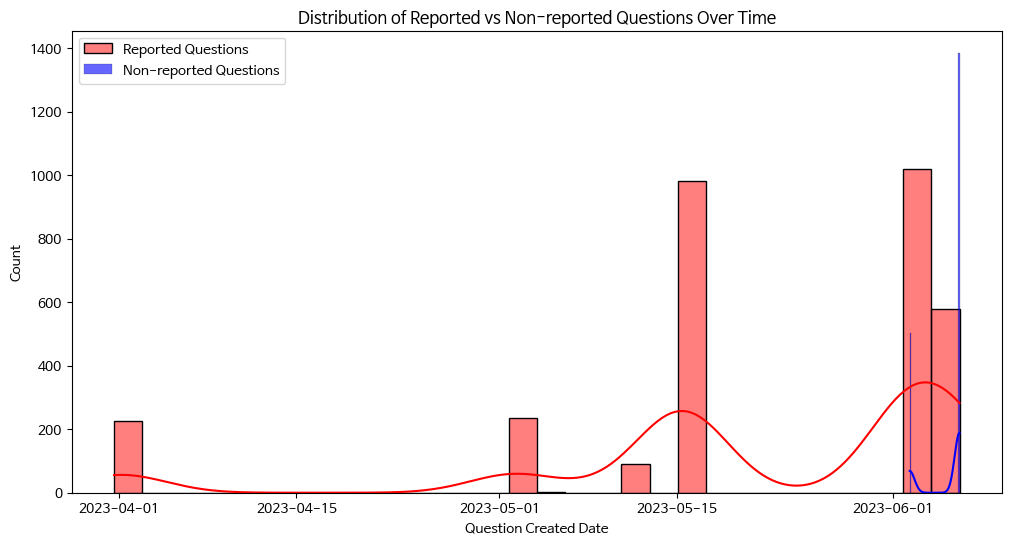

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 신고된 질문과 신고되지 않은 질문 분리
reported_questions = polls_question[polls_question["id"].isin(polls_questionreport["question_id"])]
non_reported_questions = polls_question[~polls_question["id"].isin(polls_questionreport["question_id"])]

# 날짜별 신고된 질문 수 vs 신고되지 않은 질문 수
reported_questions["created_at"] = pd.to_datetime(reported_questions["created_at"])
non_reported_questions["created_at"] = pd.to_datetime(non_reported_questions["created_at"])

plt.figure(figsize=(12,6))
sns.histplot(reported_questions["created_at"], bins=30, color="red", label="Reported Questions", kde=True)
sns.histplot(non_reported_questions["created_at"], bins=30, color="blue", label="Non-reported Questions", kde=True, alpha=0.6)
plt.xlabel("Question Created Date")
plt.ylabel("Count")
plt.legend()
plt.title("Distribution of Reported vs Non-reported Questions Over Time")
plt.show()


### 신고 사유와 질문 내용 분석
- > 신고된 질문의 텍스트를 분석하여 특정 유형의 질문이 신고될 가능성이 높은지 확인

- question_text에서 특정 키워드가 신고된 질문에 많이 포함되는지 확인
- 신고 사유(reason)와 질문 텍스트 간의 연관성 분석
- 워드클라우드 또는 키워드 빈도 분석

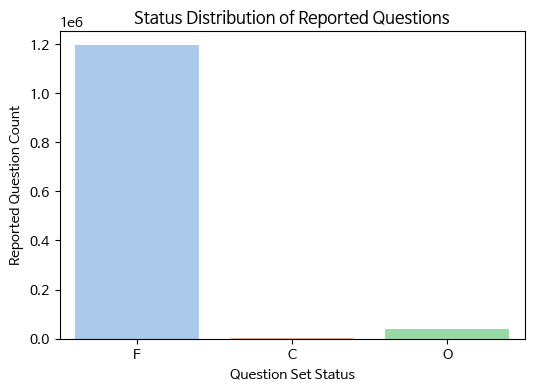

In [ ]:
# 신고된 질문과 질문 세트 상태 병합
polls_questionset["question_piece_id_list"] = polls_questionset["question_piece_id_list"].apply(eval)  # 리스트 변환
polls_questionpiece_reported = polls_questionpiece[polls_questionpiece["question_id"].isin(polls_questionreport["question_id"])]

# 질문 조각 ID가 포함된 질문 세트 찾기
question_set_status = polls_questionset.explode("question_piece_id_list").merge(
    polls_questionpiece_reported, left_on="question_piece_id_list", right_on="id", how="inner"
)

# 상태별 신고된 질문 비율 시각화
plt.figure(figsize=(6,4))
sns.countplot(data=question_set_status, x="status", palette="pastel")
plt.title("Status Distribution of Reported Questions")
plt.xlabel("Question Set Status")
plt.ylabel("Reported Question Count")
plt.show()


### 투표 질문

#### 투표 및 질문 관련 분석

In [ ]:
# 질문별 투표 참여율
import pandas as pd

# 질문별 투표 참여율 계산
question_stats = accounts_userquestionrecord.groupby('question_id').agg(
    total_users=('user_id', 'nunique'),
    voted_users=('chosen_user_id', 'nunique')
).reset_index()

question_stats['vote_rate'] = question_stats['voted_users'] / question_stats['total_users']
question_stats = question_stats.sort_values(by='vote_rate', ascending=False)

print(question_stats)


      question_id  total_users  voted_users  vote_rate
4262         4448            2            3   1.500000
4776         5096            2            3   1.500000
4323         4527            2            3   1.500000
3823         3932            8           11   1.375000
4267         4455            3            4   1.333333
...           ...          ...          ...        ...
3196         3305            9            8   0.888889
3684         3793            9            8   0.888889
2366         2475           25           22   0.880000
3528         3637            8            7   0.875000
3706         3815            7            6   0.857143

[4805 rows x 4 columns]


In [ ]:
#유저별 투표 참여율
user_stats = accounts_userquestionrecord.groupby('user_id').agg(
    questions_participated=('question_id', 'nunique'),
    votes_made=('chosen_user_id', 'nunique')
).reset_index()

user_stats['avg_votes_per_question'] = user_stats['votes_made'] / user_stats['questions_participated']
user_stats = user_stats.sort_values(by='avg_votes_per_question', ascending=False)

print(user_stats)


      user_id  questions_participated  votes_made  avg_votes_per_question
4848  1583358                       2           2                1.000000
4582  1470620                       3           3                1.000000
2900  1167130                       1           1                1.000000
3037  1185982                       2           2                1.000000
160    850832                       1           1                1.000000
...       ...                     ...         ...                     ...
4783  1546029                     147           2                0.013605
4115  1388911                     199           2                0.010050
1829   952220                    1050          10                0.009524
4131  1401244                     381           2                0.005249
3252  1214232                     692           2                0.002890

[4849 rows x 4 columns]


#### 2. 신고 관련 분석

In [ ]:
#신고된 질문의 투표율
report_vote_stats = accounts_userquestionrecord.groupby('question_id').agg(
    total_users=('user_id', 'nunique'),
    voted_users=('chosen_user_id', 'nunique'),
    total_reports=('report_count', 'sum')
).reset_index()

report_vote_stats['vote_rate'] = report_vote_stats['voted_users'] / report_vote_stats['total_users']
report_vote_stats['report_rate'] = report_vote_stats['total_reports'] / report_vote_stats['total_users']

report_vote_stats = report_vote_stats.sort_values(by='report_rate', ascending=False)

print(report_vote_stats)


      question_id  total_users  voted_users  total_reports  vote_rate  \
1028         1137          298          303             14   1.016779   
882           991          331          354              3   1.069486   
934          1043          223          226              2   1.013453   
1019         1128          228          242              2   1.061404   
1282         1391          324          336              2   1.037037   
...           ...          ...          ...            ...        ...   
1706         1815           27           30              0   1.111111   
1705         1814           29           30              0   1.034483   
1704         1813           37           38              0   1.027027   
1703         1812           24           24              0   1.000000   
4804         5133            3            3              0   1.000000   

      report_rate  
1028     0.046980  
882      0.009063  
934      0.008969  
1019     0.008772  
1282     0.006173  
...

In [ ]:
# 질문 상태 비율 분석
status_stats = accounts_userquestionrecord.groupby('status').agg(
    total_count=('question_id', 'count')
).reset_index()

status_stats['percentage'] = status_stats['total_count'] / len(accounts_userquestionrecord) * 100

print(status_stats)


  status  total_count  percentage
0      B          658    0.054043
1      C      1156322   94.970589
2      I        60578    4.975369


In [ ]:
# 답변 상태 분석
answer_status_stats = accounts_userquestionrecord.groupby('answer_status').agg(
    total_questions=('question_id', 'count')
).reset_index()

answer_status_stats['percentage'] = answer_status_stats['total_questions'] / len(accounts_userquestionrecord) * 100

print(answer_status_stats)


  answer_status  total_questions  percentage
0             A           111761    9.179111
1             N          1097932   90.174924
2             P             7865    0.645965


In [ ]:
# 답변 시간(answer_updated_at)
accounts_userquestionrecord['answer_date'] = pd.to_datetime(accounts_userquestionrecord['answer_updated_at']).dt.date
answer_time_stats = accounts_userquestionrecord[accounts_userquestionrecord['answer_updated_at'].notna()].groupby('answer_date').agg(
    total_answers=('question_id', 'count')
).reset_index()

answer_time_stats = answer_time_stats.sort_values(by='answer_date', ascending=False)

print(answer_time_stats)


    answer_date  total_answers
272  2024-05-08              4
271  2024-05-07             11
270  2024-05-06              8
269  2024-05-05             10
268  2024-05-03              5
..          ...            ...
4    2023-05-02          13618
3    2023-05-01          12249
2    2023-04-30          16137
1    2023-04-29          11401
0    2023-04-28           3170

[273 rows x 2 columns]


### 유저 참여 행동 분석
- 질문별 평균 opened_times 분석
- 유저별 평균 opened_times 분석


In [ ]:
#질문별 평균 opened_times 분석
question_opened_stats = accounts_userquestionrecord.groupby('question_id').agg(
    avg_opened_times=('opened_times', 'mean'),
    total_users=('user_id', 'nunique')
).reset_index()

question_opened_stats = question_opened_stats.sort_values(by='avg_opened_times', ascending=False)

print(question_opened_stats)


      question_id  avg_opened_times  total_users
4587         4857               3.0            1
4557         4823               3.0            1
4378         4592               3.0            1
4735         5046               3.0            1
4608         4883               2.0            1
...           ...               ...          ...
3435         3544               0.0            9
3434         3543               0.0            8
3433         3542               0.0           13
3432         3541               0.0            7
4804         5133               0.0            3

[4805 rows x 3 columns]


In [ ]:
#유저별 평균 opened_times 분석
user_opened_stats = accounts_userquestionrecord.groupby('user_id').agg(
    avg_opened_times=('opened_times', 'mean'),
    total_questions=('question_id', 'count')
).reset_index()

user_opened_stats = user_opened_stats.sort_values(by='avg_opened_times', ascending=False)

print(user_opened_stats)


      user_id  avg_opened_times  total_questions
2124  1041814          1.000000                2
4777  1543664          1.000000                1
3417  1237618          0.857143                7
1824   951022          0.666667                3
416    865649          0.666667                3
...       ...               ...              ...
3223  1210903          0.000000                5
3175  1206675          0.000000               31
3150  1203090          0.000000               65
3147  1202627          0.000000                5
4848  1583358          0.000000                2

[4849 rows x 3 columns]


In [ ]:
import pandas as pd



# 동일한 투표(question_piece_id)에 대해 선택된 유저(chosen_user_id)의 수 계산
vote_candidates = accounts_userquestionrecord.groupby('question_id')['user_id'].nunique().reset_index()

# 컬럼 이름을 명확히 하기 위해 'candidates_count'로 변경
vote_candidates.rename(columns={'user_id': 'user_id'}, inplace=True)

# 결과 확인
print(vote_candidates)


      question_id  user_id
0              99     1243
1             100     1247
2             101     1308
3             102     1397
4             103     1214
...           ...      ...
4800         5129        3
4801         5130        1
4802         5131        2
4803         5132        1
4804         5133        3

[4805 rows x 2 columns]


In [ ]:
import pandas as pd



# 동일한 투표(question_piece_id)에 대해 선택된 유저(chosen_user_id)의 수 계산
vote_candidates = accounts_userquestionrecord.groupby('question_id')['chosen_user_id'].nunique().reset_index()

# 컬럼 이름을 명확히 하기 위해 'candidates_count'로 변경
vote_candidates.rename(columns={'chosen_user_id': 'candidate'}, inplace=True)

# 결과 확인
print(vote_candidates)


      question_id  candidate
0              99       1373
1             100       1301
2             101       1324
3             102       1453
4             103       1292
...           ...        ...
4800         5129          3
4801         5130          1
4802         5131          2
4803         5132          1
4804         5133          3

[4805 rows x 2 columns]


하나의 question_id에 대해서

총 투표 한 사람의 수 < 투표 후보자로 올라온 사람들의 수

In [ ]:
import pandas as pd


# 결제 유저와 비결제 유저 구분 (status가 1이면 결제한 유저)
paid_users = accounts_userquestionrecord[accounts_userquestionrecord["status"] == 1]
non_paid_users = accounts_userquestionrecord[accounts_userquestionrecord["status"] == 0]

# 그룹별 평균 비교
comparison = accounts_userquestionrecord.groupby("status").agg({
    "opened_times": "mean",  # 평균 열어본 횟수
    "question_id": "nunique",  # 참여한 질문 수
    "question_piece_id": "nunique",  # 참여한 투표 수
    "report_count": "mean",  # 신고 횟수 평균
    "has_read": "mean"  # 읽은 비율
}).rename(columns={"question_id": "unique_questions", "question_piece_id": "unique_votes"})

print("결제 vs 비결제 유저 비교:\n", comparison)

# 결제 유저들의 투표 활동 분석
paid_votes = paid_users["question_piece_id"].value_counts()
print("결제 유저들의 인기 투표 ID:\n", paid_votes.head(10))


결제 vs 비결제 유저 비교:
         opened_times  unique_questions  unique_votes  report_count  has_read
status                                                                      
B           0.182371               445           658      0.003040  0.504559
C           0.000000              4790       1156322      0.000106  0.535015
I           1.270791              2959         60578      0.001486  0.940094
결제 유저들의 인기 투표 ID:
 Series([], Name: count, dtype: int64)


### 결제율 증가 방법
- 비결제 유저에게 인기 질문 노출
가설 : 결제한 유저들은 인기많은 질문에 대한 노출이 많았을 것이다 (결제한 질문은 대부분 인기있던 질문일 것이다. )


In [ ]:
import pandas as pd

# 🔹 질문별 투표 횟수 집계 (question_id 기준)
question_stats = accounts_userquestionrecord.groupby("question_id").agg({
    "question_piece_id": "count",  # 투표 횟수 (해당 질문에 대한 투표 개수)
    "opened_times": "sum"  # 해당 질문이 열린 횟수
}).reset_index()

# 🔹 인기 질문 기준 (투표 횟수 상위 20%)
top_20_percentile = question_stats["question_piece_id"].quantile(0.8)  # 상위 20% 기준값
popular_questions = question_stats[question_stats["question_piece_id"] >= top_20_percentile]["question_id"]

# 🔹 유저별 인기 질문 노출 여부 확인
accounts_userquestionrecord["is_popular_question"] = accounts_userquestionrecord["question_id"].isin(popular_questions)

# 🔹 결제한 유저만 필터링 (status == 1)
paid_users = accounts_userquestionrecord[accounts_userquestionrecord["status"] != "C"]
non_paid_users = accounts_userquestionrecord[accounts_userquestionrecord["status"] == "C"]

# 🔹 결제 유저와 비결제 유저의 인기 질문 노출 비율 비교
comparison_df = pd.DataFrame({
    "category": ["Paid Users", "Non-Paid Users"],
    "popular_question_exposure": [
        paid_users["is_popular_question"].mean(),   # 결제한 유저가 인기 질문을 본 비율
        non_paid_users["is_popular_question"].mean()  # 비결제 유저가 인기 질문을 본 비율
    ]
})

print(comparison_df)


         category  popular_question_exposure
0      Paid Users                   0.769923
1  Non-Paid Users                   0.805928


확인결과 결제한 사람들이 인기있는 질문에 더 많이 접근했을것이다. 라고 보기에는 어려울듯함.

>> 결제한 질문이 인기 있는 질문인지 확인해보자


In [ ]:
# 🔹 결제된 질문 필터링 (status == 1)
paid_questions = accounts_userquestionrecord[accounts_userquestionrecord["status"] == "I"]["question_id"].unique()

# 🔹 전체 질문 목록
all_questions = accounts_userquestionrecord["question_id"].unique()

# 🔹 결제된 질문이 존재하는지 확인 후 처리
if len(paid_questions) > 0:
    paid_popular_ratio = sum(pd.Series(paid_questions).isin(popular_questions)) / len(paid_questions)
else:
    paid_popular_ratio = 0  # 결제된 질문이 없을 경우 0으로 설정

# 🔹 전체 질문에서 인기 질문 비율 계산
if len(all_questions) > 0:
    overall_popular_ratio = sum(pd.Series(all_questions).isin(popular_questions)) / len(all_questions)
else:
    overall_popular_ratio = 0  # 전체 질문이 없을 경우 0으로 설정

# 🔹 결과 정리
popularity_comparison = pd.DataFrame({
    "category": ["Paid Questions", "All Questions"],
    "popular_question_ratio": [paid_popular_ratio, overall_popular_ratio]
})

print(popularity_comparison)


         category  popular_question_ratio
0  Paid Questions                0.330179
1   All Questions                0.203330


In [ ]:
print("결제된 질문 개수:", len(paid_questions))


결제된 질문 개수: 2959


In [ ]:
import pandas as pd

# 친구 요청 테이블
# 예시로 'accounts_friendrequest' DataFrame이 있다고 가정합니다.

# 1. 받은 친구 수 계산 (receive_user_id 기준)
received_friends = accounts_friendrequest[accounts_friendrequest["status"] == "A"]['receive_user_id'].value_counts().reset_index()
received_friends.columns = ['user_id', 'received_friends']

# 2. 보낸 친구 수 계산 (send_user_id 기준)
sent_friends = accounts_friendrequest[accounts_friendrequest["status"] == "A"]['send_user_id'].value_counts().reset_index()
sent_friends.columns = ['user_id', 'sent_friends']

# 3. 두 개의 친구 수를 합치기
friends_count = pd.merge(received_friends, sent_friends, on='user_id', how='outer').fillna(0)

# 4. 친구 수 합산 (받은 친구 + 보낸 친구)
friends_count['total_friends'] = friends_count['received_friends'] + friends_count['sent_friends']

# 결과 확인
print(friends_count.head())


   user_id  received_friends  sent_friends  total_friends
0   831962               0.0           1.0            1.0
1   832151               6.0           2.0            8.0
2   832340               4.0           7.0           11.0
3   833024              35.0           1.0           36.0
4   833041              21.0           8.0           29.0


In [ ]:
# CSV로 저장
friends_count.to_csv("friends_count.csv", index=False)

# 파일 경로 확인
print("CSV 파일이 성공적으로 저장되었습니다.")


CSV 파일이 성공적으로 저장되었습니다.


In [ ]:
import pandas as pd

# 1. 결제한 유저들 추출 (status == "I")
paid_users = accounts_userquestionrecord[accounts_userquestionrecord["status"] == "I"]
paid_users = paid_users["user_id"].unique()  # 결제한 유저들의 user_id 리스트

# 2. 친구 수 데이터와 결제 여부 결합
friends_count["is_paid_user"] = friends_count["user_id"].apply(lambda x: 1 if x in paid_users else 0)

# 3. 결제 여부와 친구 수 관계 분석
# - 결제한 유저들의 친구 수 평균
paid_avg_friends = friends_count[friends_count["is_paid_user"] == 1]["total_friends"].mean()
# - 결제하지 않은 유저들의 친구 수 평균
non_paid_avg_friends = friends_count[friends_count["is_paid_user"] == 0]["total_friends"].mean()

# 4. 결제 여부와 친구 수 간의 상관 관계 분석 (피어슨 상관 계수)
correlation = friends_count["total_friends"].corr(friends_count["is_paid_user"])

# 5. 결과 출력
print(f"결제한 유저들의 평균 친구 수: {paid_avg_friends}")
print(f"결제하지 않은 유저들의 평균 친구 수: {non_paid_avg_friends}")
print(f"결제 여부와 친구 수의 상관 관계: {correlation}")


결제한 유저들의 평균 친구 수: 47.110865724381625
결제하지 않은 유저들의 평균 친구 수: 39.55626239835478
결제 여부와 친구 수의 상관 관계: 0.022657458052373108


느린 코드

In [ ]:
import pandas as pd
from datetime import timedelta

# friend_id_list는 쉼표로 구분된 문자열로 가정
#accounts_user['friend_id_list'] = accounts_user['friend_id_list'].apply(lambda x: x.split(','))

# 2. accounts_paymenthistory에서 결제 정보 가져오기
# 결제 시간 파싱
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# 3. 유저 결제 후 10분 이내에 친구들 결제 여부 확인하기
# 각 결제 후 10분 이내에 친구들이 결제한 경우를 찾기 위한 결과 리스트
result = []

for _, user_row in accounts_paymenthistory.iterrows():
    user_id = user_row['user_id']
    payment_time = user_row['created_at']

    # 해당 유저의 친구 목록 가져오기
    friends = accounts_user.loc[accounts_user['id'] == user_id, 'friend_id_list'].values[0]

    # 친구들이 결제한 기록 필터링
    friends_payment = accounts_paymenthistory[
        accounts_paymenthistory['user_id'].isin(friends) &
        (accounts_paymenthistory['created_at'] >= payment_time) &
        (accounts_paymenthistory['created_at'] <= payment_time + timedelta(days=7))
    ]

    # 결제한 친구들 수 카운트
    result.append(len(friends_payment))

# 4. 결제한 친구들의 수 카운트
num_friends_paid = sum(result)
print(f"결제한 친구들의 수: {num_friends_paid}")


결제한 친구들의 수: 0


빠른 코드

In [ ]:
import pandas as pd
from datetime import timedelta

# 1️⃣ 결제 테이블 로드 및 시간 변환
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# 2️⃣ 유저별 결제 시간 딕셔너리 생성 (더 빠른 조회를 위해)
user_payment_dict = accounts_paymenthistory.groupby('user_id')['created_at'].apply(list).to_dict()

# 3️⃣ 친구 목록을 리스트로 변환
accounts_user['friend_id_list'] = accounts_user['friend_id_list'].apply(
    lambda x: x.split(',') if isinstance(x, str) else []
)

# 4️⃣ 결제한 유저 목록만 가져오기
paid_users = set(accounts_paymenthistory['user_id'].unique())

# 5️⃣ 결제한 친구 확인을 위한 리스트
result = []

# 6️⃣ 결제 데이터 기준으로 친구 결제 여부 확인
for user_id, payment_times in user_payment_dict.items():
    # 해당 유저의 친구 목록 가져오기
    friends = accounts_user.loc[accounts_user['id'] == user_id, 'friend_id_list']

    if len(friends) == 0:
        continue  # 친구 목록이 없는 경우 스킵

    friends = friends.values[0]  # 실제 리스트 가져오기
    friends = list(map(int, friends))  # 문자열을 숫자로 변환

    # 결제한 친구만 필터링
    paying_friends = [f for f in friends if f in paid_users]

    # 친구 결제 시간 확인
    for payment_time in payment_times:
        count = sum(
            any(
                payment_time <= friend_time <= payment_time + timedelta(minutes=5000)
                for friend_time in user_payment_dict.get(friend_id, [])
            )
            for friend_id in paying_friends
        )
        result.append(count)

# 7️⃣ 최종 결제한 친구 수 출력
num_friends_paid = sum(result)
print(f"결제한 친구들의 수: {num_friends_paid}")


ValueError: invalid literal for int() with base 10: '[841345'

In [ ]:
import pandas as pd
from datetime import timedelta

# 1️⃣ 결제 테이블 로드 및 시간 변환
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# 2️⃣ 유저별 결제 시간 딕셔너리 생성 (더 빠른 조회를 위해)
user_payment_dict = accounts_paymenthistory.groupby('user_id')['created_at'].apply(list).to_dict()

# 3️⃣ 친구 목록을 리스트로 변환 (여기서 불필요한 문자 제거)
accounts_user['friend_id_list'] = accounts_user['friend_id_list'].apply(
    lambda x: [int(i.strip()) for i in x.strip('[]').split(',')] if isinstance(x, str) else []
)

# 4️⃣ 결제한 유저 목록만 가져오기
paid_users = set(accounts_paymenthistory['user_id'].unique())

# 5️⃣ 결제한 친구 확인을 위한 리스트
result = []

# 6️⃣ 결제 데이터 기준으로 친구 결제 여부 확인
for user_id, payment_times in user_payment_dict.items():
    # 해당 유저의 친구 목록 가져오기
    friends = accounts_user.loc[accounts_user['id'] == user_id, 'friend_id_list']

    if len(friends) == 0:
        continue  # 친구 목록이 없는 경우 스킵

    friends = friends.values[0]  # 실제 리스트 가져오기

    # 결제한 친구만 필터링
    paying_friends = [f for f in friends if f in paid_users]

    # 친구 결제 시간 확인
    for payment_time in payment_times:
        count = sum(
            any(
                payment_time <= friend_time <= payment_time + timedelta(minutes=5000)
                for friend_time in user_payment_dict.get(friend_id, [])
            )
            for friend_id in paying_friends
        )
        result.append(count)

# 7️⃣ 최종 결제한 친구 수 출력
num_friends_paid = sum(result)
print(f"결제한 친구들의 수: {num_friends_paid}")
import pandas as pd
from datetime import timedelta

# 1️⃣ 결제 테이블 로드 및 시간 변환
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# 2️⃣ 유저별 결제 시간 딕셔너리 생성 (더 빠른 조회를 위해)
user_payment_dict = accounts_paymenthistory.groupby('user_id')['created_at'].apply(list).to_dict()

# 3️⃣ 친구 목록을 리스트로 변환 (여기서 불필요한 문자 제거)
accounts_user['friend_id_list'] = accounts_user['friend_id_list'].apply(
    lambda x: [int(i.strip()) for i in x.strip('[]').split(',')] if isinstance(x, str) else []
)

# 4️⃣ 결제한 유저 목록만 가져오기
paid_users = set(accounts_paymenthistory['user_id'].unique())

# 5️⃣ 결제한 친구 확인을 위한 리스트
result = []

# 6️⃣ 결제 데이터 기준으로 친구 결제 여부 확인
for user_id, payment_times in user_payment_dict.items():
    # 해당 유저의 친구 목록 가져오기
    friends = accounts_user.loc[accounts_user['id'] == user_id, 'friend_id_list']

    if len(friends) == 0:
        continue  # 친구 목록이 없는 경우 스킵

    friends = friends.values[0]  # 실제 리스트 가져오기

    # 결제한 친구만 필터링
    paying_friends = [f for f in friends if f in paid_users]

    # 친구 결제 시간 확인
    for payment_time in payment_times:
        count = sum(
            any(
                payment_time <= friend_time <= payment_time + timedelta(minutes=5000)
                for friend_time in user_payment_dict.get(friend_id, [])
            )
            for friend_id in paying_friends
        )
        result.append(count)

# 7️⃣ 최종 결제한 친구 수 출력
num_friends_paid = sum(result)
print(f"결제한 친구들의 수: {num_friends_paid}")


결제한 친구들의 수: 0
결제한 친구들의 수: 0


결제한 사람 중 친구도 결제한 경우

In [ ]:
import pandas as pd
from datetime import timedelta


# 1️⃣ 결제 테이블 로드 및 시간 변환
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# 2️⃣ 유저별 결제 시간 딕셔너리 생성 (더 빠른 조회를 위해)
user_payment_dict = accounts_paymenthistory.groupby('user_id')['created_at'].apply(list).to_dict()

# 3️⃣ 친구 목록을 리스트로 변환 (NaN, 빈 값 처리 추가)
accounts_user['friend_id_list'] = accounts_user['friend_id_list'].fillna('').apply(
    lambda x: [int(i.strip()) for i in x.strip('[]').split(',') if i.strip().isdigit()] if isinstance(x, str) and x else []
)

# 4️⃣ 결제한 유저 목록만 가져오기 (set 사용)
paid_users = set(accounts_paymenthistory['user_id'].unique())

# 5️⃣ 결제한 친구 확인을 위한 리스트
result = []

# 6️⃣ 결제 데이터 기준으로 친구 결제 여부 확인
for user_id, payment_times in user_payment_dict.items():
    # 해당 유저의 친구 목록 가져오기
    friends = accounts_user.loc[accounts_user['id'] == user_id, 'friend_id_list']

    if friends.empty:
        continue  # 친구 목록이 없는 경우 스킵

    friends = friends.values[0]  # 실제 리스트 가져오기

    # 결제한 친구만 필터링
    paying_friends = [f for f in friends if f in paid_users]

    # 친구 결제 시간 확인
    for payment_time in payment_times:
        count = sum(
            any(
                payment_time <= friend_time <= payment_time + timedelta(minutes=5000)
                for friend_time in user_payment_dict.get(friend_id, [])
            )
            for friend_id in paying_friends if friend_id in user_payment_dict
        )
        result.append(count)

# 7️⃣ 최종 결제한 친구 수 출력
num_friends_paid = sum(result)
print(f"결제한 친구들의 수: {num_friends_paid}")

결제한 친구들의 수: 0


In [ ]:
accounts_paymenthistory.head()

,id,productId,phone_type,created_at,user_id,paid
0,6,heart.777,A,2023-05-13 21:28:34,1211127,1
1,7,heart.777,A,2023-05-13 21:29:39,1151343,1
2,8,heart.777,A,2023-05-13 21:31:33,1002147,1
3,9,heart.777,A,2023-05-13 21:31:39,1095040,1
4,11,heart.777,A,2023-05-13 21:34:32,1164081,1


In [ ]:
import pandas as pd
import scipy.stats as stats

# 결제 여부 데이터 생성
accounts_paymenthistory['paid'] = 1  # 결제한 유저는 1
paid_users = accounts_paymenthistory[['user_id', 'paid']].drop_duplicates()

# accounts_user 테이블과 결제 데이터를 결합
merged_df = accounts_user.merge(paid_users, left_on='id', right_on='user_id', how='left').fillna({'paid': 0})

# 푸시 알림 여부별 결제 횟수 집계
contingency_table = pd.crosstab(merged_df['is_push_on'], merged_df['paid'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 통계량:", chi2)
print("p-value:", p)

# 결론 도출
if p < 0.05:
    print("푸시 알림과 결제 전환 사이에 유의미한 관계가 있음.")
else:
    print("푸시 알림과 결제 전환 사이에 유의미한 관계가 없음.")


카이제곱 통계량: 536.9823791192532
p-value: 8.54895323433843e-119
푸시 알림과 결제 전환 사이에 유의미한 관계가 있음.


### school


In [ ]:
accounts_school.head()

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


In [ ]:
accounts_user.head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,NaN,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35,[],[],N,0,29,0,15,12.0


In [ ]:
accounts_group.head()

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


## 보고서용 시각화

현재 서비스는 수십만 DAU(최고 37만)를 기록하고 있지만, 결제 전환율은 4%에 불과하다.

-

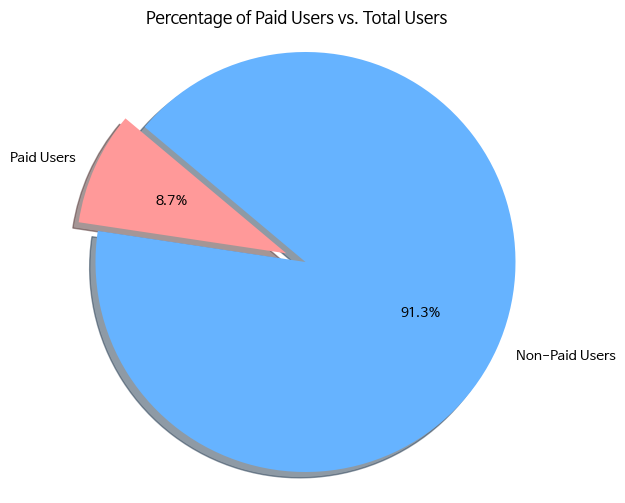

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 결제한 유저 계산 (결제 기록이 있는 유저만 추출)
paid_users = set(accounts_paymenthistory['user_id'])

# 전체 유저 수와 결제한 유저 수
total_users = accounts_user['id'].nunique()
paid_user_count = len(paid_users)

# 결제한 유저 비율 계산
paid_user_ratio = paid_user_count / total_users

# 시각화 (파이 차트 예시)
labels = ['Paid Users', 'Non-Paid Users']
sizes = [paid_user_count, total_users - paid_user_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # 첫 번째 조각을 강조

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Paid Users vs. Total Users')
plt.axis('equal')  # 원을 둥글게 표시
plt.show()


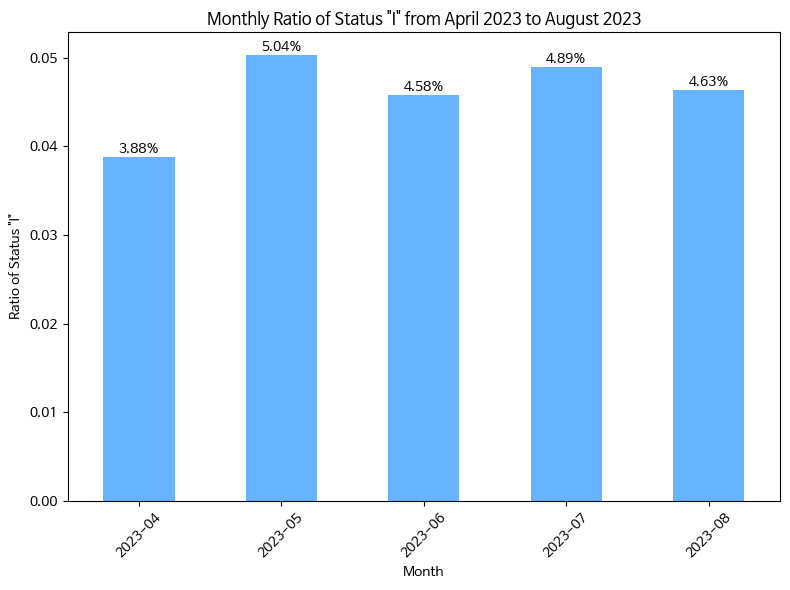

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 'created_at' 컬럼을 datetime 형식으로 변환
accounts_userquestionrecord['created_at'] = pd.to_datetime(accounts_userquestionrecord['created_at'])

# 2023년 4월부터 8월까지 데이터 필터링
filtered_data = accounts_userquestionrecord[
    (accounts_userquestionrecord['created_at'].dt.year == 2023) &
    (accounts_userquestionrecord['created_at'].dt.month >= 4) &
    (accounts_userquestionrecord['created_at'].dt.month <= 8)
]

# 월별로 그룹화하여 전체 status와 status = "I"인 건수 계산
total_status_count = filtered_data.groupby(filtered_data['created_at'].dt.to_period('M')).size()
i_status_count = filtered_data[filtered_data['status'] == 'I'].groupby(filtered_data['created_at'].dt.to_period('M')).size()

# status = "I"의 비율 계산
i_status_ratio = i_status_count / total_status_count

# 시각화 (막대그래프)
plt.figure(figsize=(8,6))
ax = i_status_ratio.plot(kind='bar', color='#66b3ff')

# 각 막대 위에 퍼센트 값 추가
for i, value in enumerate(i_status_ratio):
    ax.text(i, value , f'{value:.2%}', ha='center', va='bottom', fontsize=10)

# 제목과 라벨 설정
plt.title('Monthly Ratio of Status "I" from April 2023 to August 2023')
plt.xlabel('Month')
plt.ylabel('Ratio of Status "I"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


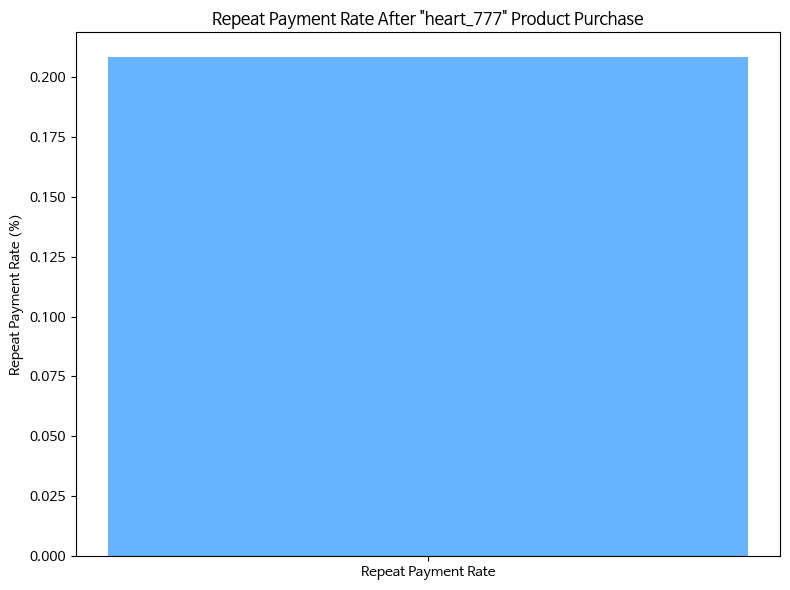

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시: accounts_paymenthistory 데이터 로드 (실제 데이터 로드 필요)
# 'created_at'을 datetime 형식으로 변환
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at'])

# 유저별 첫 결제 날짜 추출
first_payment_date = accounts_paymenthistory.groupby('user_id')['created_at'].min()

# 'heart_777' 상품 결제 이후 결제 기록 확인
heart_777_users = accounts_paymenthistory[accounts_paymenthistory['productId'] == 'heart.777']

# 'heart_777' 결제 후 또 결제한 유저 찾기
repeat_payment_users = heart_777_users[heart_777_users['created_at'] > heart_777_users.groupby('user_id')['created_at'].transform('min')]

# 유저별 첫 결제와 'heart_777' 이후 결제 비율 계산
repeat_payment_rate = repeat_payment_users['user_id'].nunique() / first_payment_date.nunique() * 100

# 시각화
plt.figure(figsize=(8,6))
plt.bar(['Repeat Payment Rate'], [repeat_payment_rate], color='#66b3ff')
plt.title('Repeat Payment Rate After "heart_777" Product Purchase')
plt.ylabel('Repeat Payment Rate (%)')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd



# 'status'가 'I'인 행 필터링 (초성 열림 상태)
open_status_records = accounts_userquestionrecord[accounts_userquestionrecord['status'] == 'I']

# 전체 선택 받은 유저 (chosen_user_id의 고유 값 계산)
total_chosen_users = accounts_userquestionrecord['chosen_user_id'].nunique()

# 'status'가 'I'인 선택 받은 유저 (chosen_user_id의 고유 값 계산)
open_chosen_users = open_status_records['chosen_user_id'].nunique()

# 초성 열림 상태인 유저의 비율 계산
open_ratio = open_chosen_users / total_chosen_users

# 출력
print(f"초성 열림 상태인 선택 받은 유저의 비율: {open_ratio * 100:.2f}%")


초성 열림 상태인 선택 받은 유저의 비율: 48.61%


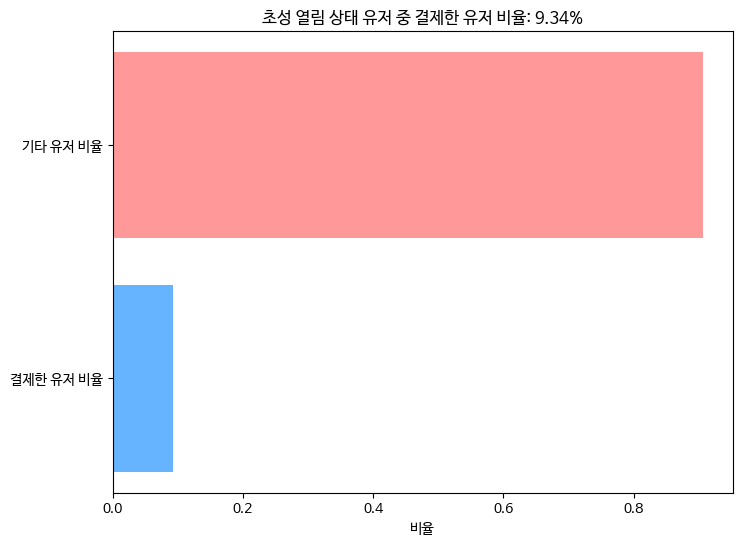

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 초성 열림 상태인 유저들 필터링
open_status_users = accounts_userquestionrecord[accounts_userquestionrecord['status'] == 'I']['chosen_user_id'].unique()

# 결제한 유저들 찾기
paid_users = accounts_paymenthistory['user_id'].unique()

# 초성 열림 상태인 유저들 중 결제한 유저들 찾기
paid_open_users = set(open_status_users) & set(paid_users)

# 초성 열림 상태인 유저들의 전체 수
total_open_users = len(open_status_users)

# 결제한 유저들의 수
paid_open_users_count = len(paid_open_users)

# 결제한 유저 비율 계산
paid_open_ratio = paid_open_users_count / total_open_users

# 시각화: 가로 막대그래프
labels = ['결제한 유저 비율', '기타 유저 비율']
values = [paid_open_ratio, 1 - paid_open_ratio]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 6))  # X축 길이를 길게 조정
plt.barh(labels, values, color=colors)
plt.title(f"초성 열림 상태 유저 중 결제한 유저 비율: {paid_open_ratio * 100:.2f}%")
plt.xlabel('비율')
plt.show()
